In [1]:
import pandas as pd
import numpy as np

In [2]:
gtf_file_path = "/links/groups/treutlein/USERS/jjans/resources/genomes/hsapiens/Homo_sapiens.GRCh38.111.chr.gtf"

def get_ens_dict(file_path):
    with open(file_path) as f:
        gtf = list(f)

    gtf = [x for x in gtf if not x.startswith('#')]
    gtf = [x for x in gtf if 'gene_id "' in x and 'gene_name "' in x]
    if len(gtf) == 0:
        print('you need to change gene_id " and gene_name " formats')
    
    gtf = list(map(lambda x: (x.split('gene_id "')[1].split('"')[0], x.split('gene_name "')[1].split('"')[0]), gtf))
    gtf = dict(set(gtf))
    return gtf

gtf_dict = get_ens_dict(gtf_file_path) #replace with your file path

In [3]:
import os

In [4]:
stability_experiments = [x for x in os.listdir() if 'Stability' in x]

In [5]:
stability_experiments

['Stability_d21',
 'Stability_d49',
 'Stability_d35',
 'Stability_d42',
 'Stability_d10',
 'Stability_d28']

In [6]:
i = 0
for stab_exp in stability_experiments:
    stab_exp_exps = os.listdir(stab_exp)
    for stab_exp_exp in stab_exp_exps:
        df_fh = stab_exp+"/"+stab_exp_exp+"/10.MAPPING/"+stab_exp_exp+"_STAR_ReadsPerGene.out.tab"
        print(df_fh)
        df = pd.read_csv(df_fh,sep="\t",skiprows=4,header=None)
        #parse data
        df.columns = ['Gene_ID','Unstranded','1st_read','2nd_read']
        result_list = [gtf_dict[x] if x in gtf_dict else x for x in df['Gene_ID']]
        df['Gene_Symbol'] = result_list
        df.index = df['Gene_Symbol']

        if i == 0:
            df_all = pd.DataFrame(index=df.index)
            i+=1

        df_all[stab_exp_exp] = df['Unstranded']




Stability_d21/Stability_d21_sample_9/10.MAPPING/Stability_d21_sample_9_STAR_ReadsPerGene.out.tab
Stability_d21/Stability_d21_sample_4/10.MAPPING/Stability_d21_sample_4_STAR_ReadsPerGene.out.tab
Stability_d21/Stability_d21_sample_5/10.MAPPING/Stability_d21_sample_5_STAR_ReadsPerGene.out.tab
Stability_d21/Stability_d21_sample_10/10.MAPPING/Stability_d21_sample_10_STAR_ReadsPerGene.out.tab
Stability_d21/Stability_d21_sample_7/10.MAPPING/Stability_d21_sample_7_STAR_ReadsPerGene.out.tab
Stability_d21/Stability_d21_sample_6/10.MAPPING/Stability_d21_sample_6_STAR_ReadsPerGene.out.tab
Stability_d21/Stability_d21_sample_1/10.MAPPING/Stability_d21_sample_1_STAR_ReadsPerGene.out.tab
Stability_d21/Stability_d21_sample_12/10.MAPPING/Stability_d21_sample_12_STAR_ReadsPerGene.out.tab
Stability_d21/Stability_d21_sample_3/10.MAPPING/Stability_d21_sample_3_STAR_ReadsPerGene.out.tab
Stability_d21/Stability_d21_sample_2/10.MAPPING/Stability_d21_sample_2_STAR_ReadsPerGene.out.tab
Stability_d21/Stability_d2

In [7]:
df_all = df_all.groupby("Gene_Symbol").sum()

In [8]:
df_all.to_csv("bulk/stability_timepoints.tsv",sep="\t")

In [9]:
import re

In [10]:
df_meta = pd.DataFrame([re.split("_",x) for x in df_all.columns])
df_meta = df_meta[[1,3]]
df_meta.columns = ['t','sample']
df_meta['t_int'] = [re.sub("d","",x) for x in df_meta['t']]
df_meta.index = df_all.columns

In [11]:
df_meta.to_csv("bulk/stability_timepoints_meta.tsv",sep="\t")

In [12]:
df_repr = pd.read_csv("bulk/reproducibility_genotypes_wSC.tsv",sep="\t",index_col=0)
meta_repr = pd.read_csv("bulk/reproducibility_genotypes_wSC_meta.tsv",sep="\t",index_col=0)

In [13]:
selected_parse_exps = ['p1_D4','p1_D8','p1_D10','p1_B4','p1_B8','p1_B10',
                       'p3_C2','p3_F2','p3_D1','p3_F4','p3_G1','p3_G10']

In [14]:
df_repr_parse = df_repr[selected_parse_exps]
meta_repr_parse = meta_repr.loc[selected_parse_exps]

In [15]:
df_all_parse = pd.merge(df_all,df_repr_parse,left_index=True,right_index=True)

In [16]:
meta_repr_parse['t'] = 'd10'
meta_repr_parse['t_int'] = 10

In [17]:
df_meta['genotype'] = '409B2'
df_meta['repl'] = 1

In [18]:
df_meta = pd.concat([df_meta,meta_repr_parse])

In [19]:
df_all_parse.to_csv("bulk/stability_timepoints_wSC.tsv",sep="\t")
df_meta.to_csv("bulk/stability_timepoints_meta_wSC.tsv",sep="\t")

/tmp/ipykernel_5271/1742051895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta['t_int'] = [re.sub("d","",x) for x in df_meta['t']]


In [22]:
df_all.sum().sort_values()

Stability_d49_sample_1      993984
Stability_d42_sample_12    1080598
Stability_d42_sample_11    1181846
Stability_d35_sample_1     1285938
Stability_d21_sample_1     1305302
                            ...   
Stability_d35_sample_6     3092852
Stability_d10_sample_3     3176690
Stability_d10_sample_7     3299159
Stability_d35_sample_7     3463366
Stability_d49_sample_7     3714176
Length: 72, dtype: int64

In [32]:
df_all_CPM = df_all/df_all.sum()*1e6

In [36]:
var_genes = list(df_all_CPM.T.var().sort_values(ascending=False).head(n=1000).index)

In [53]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

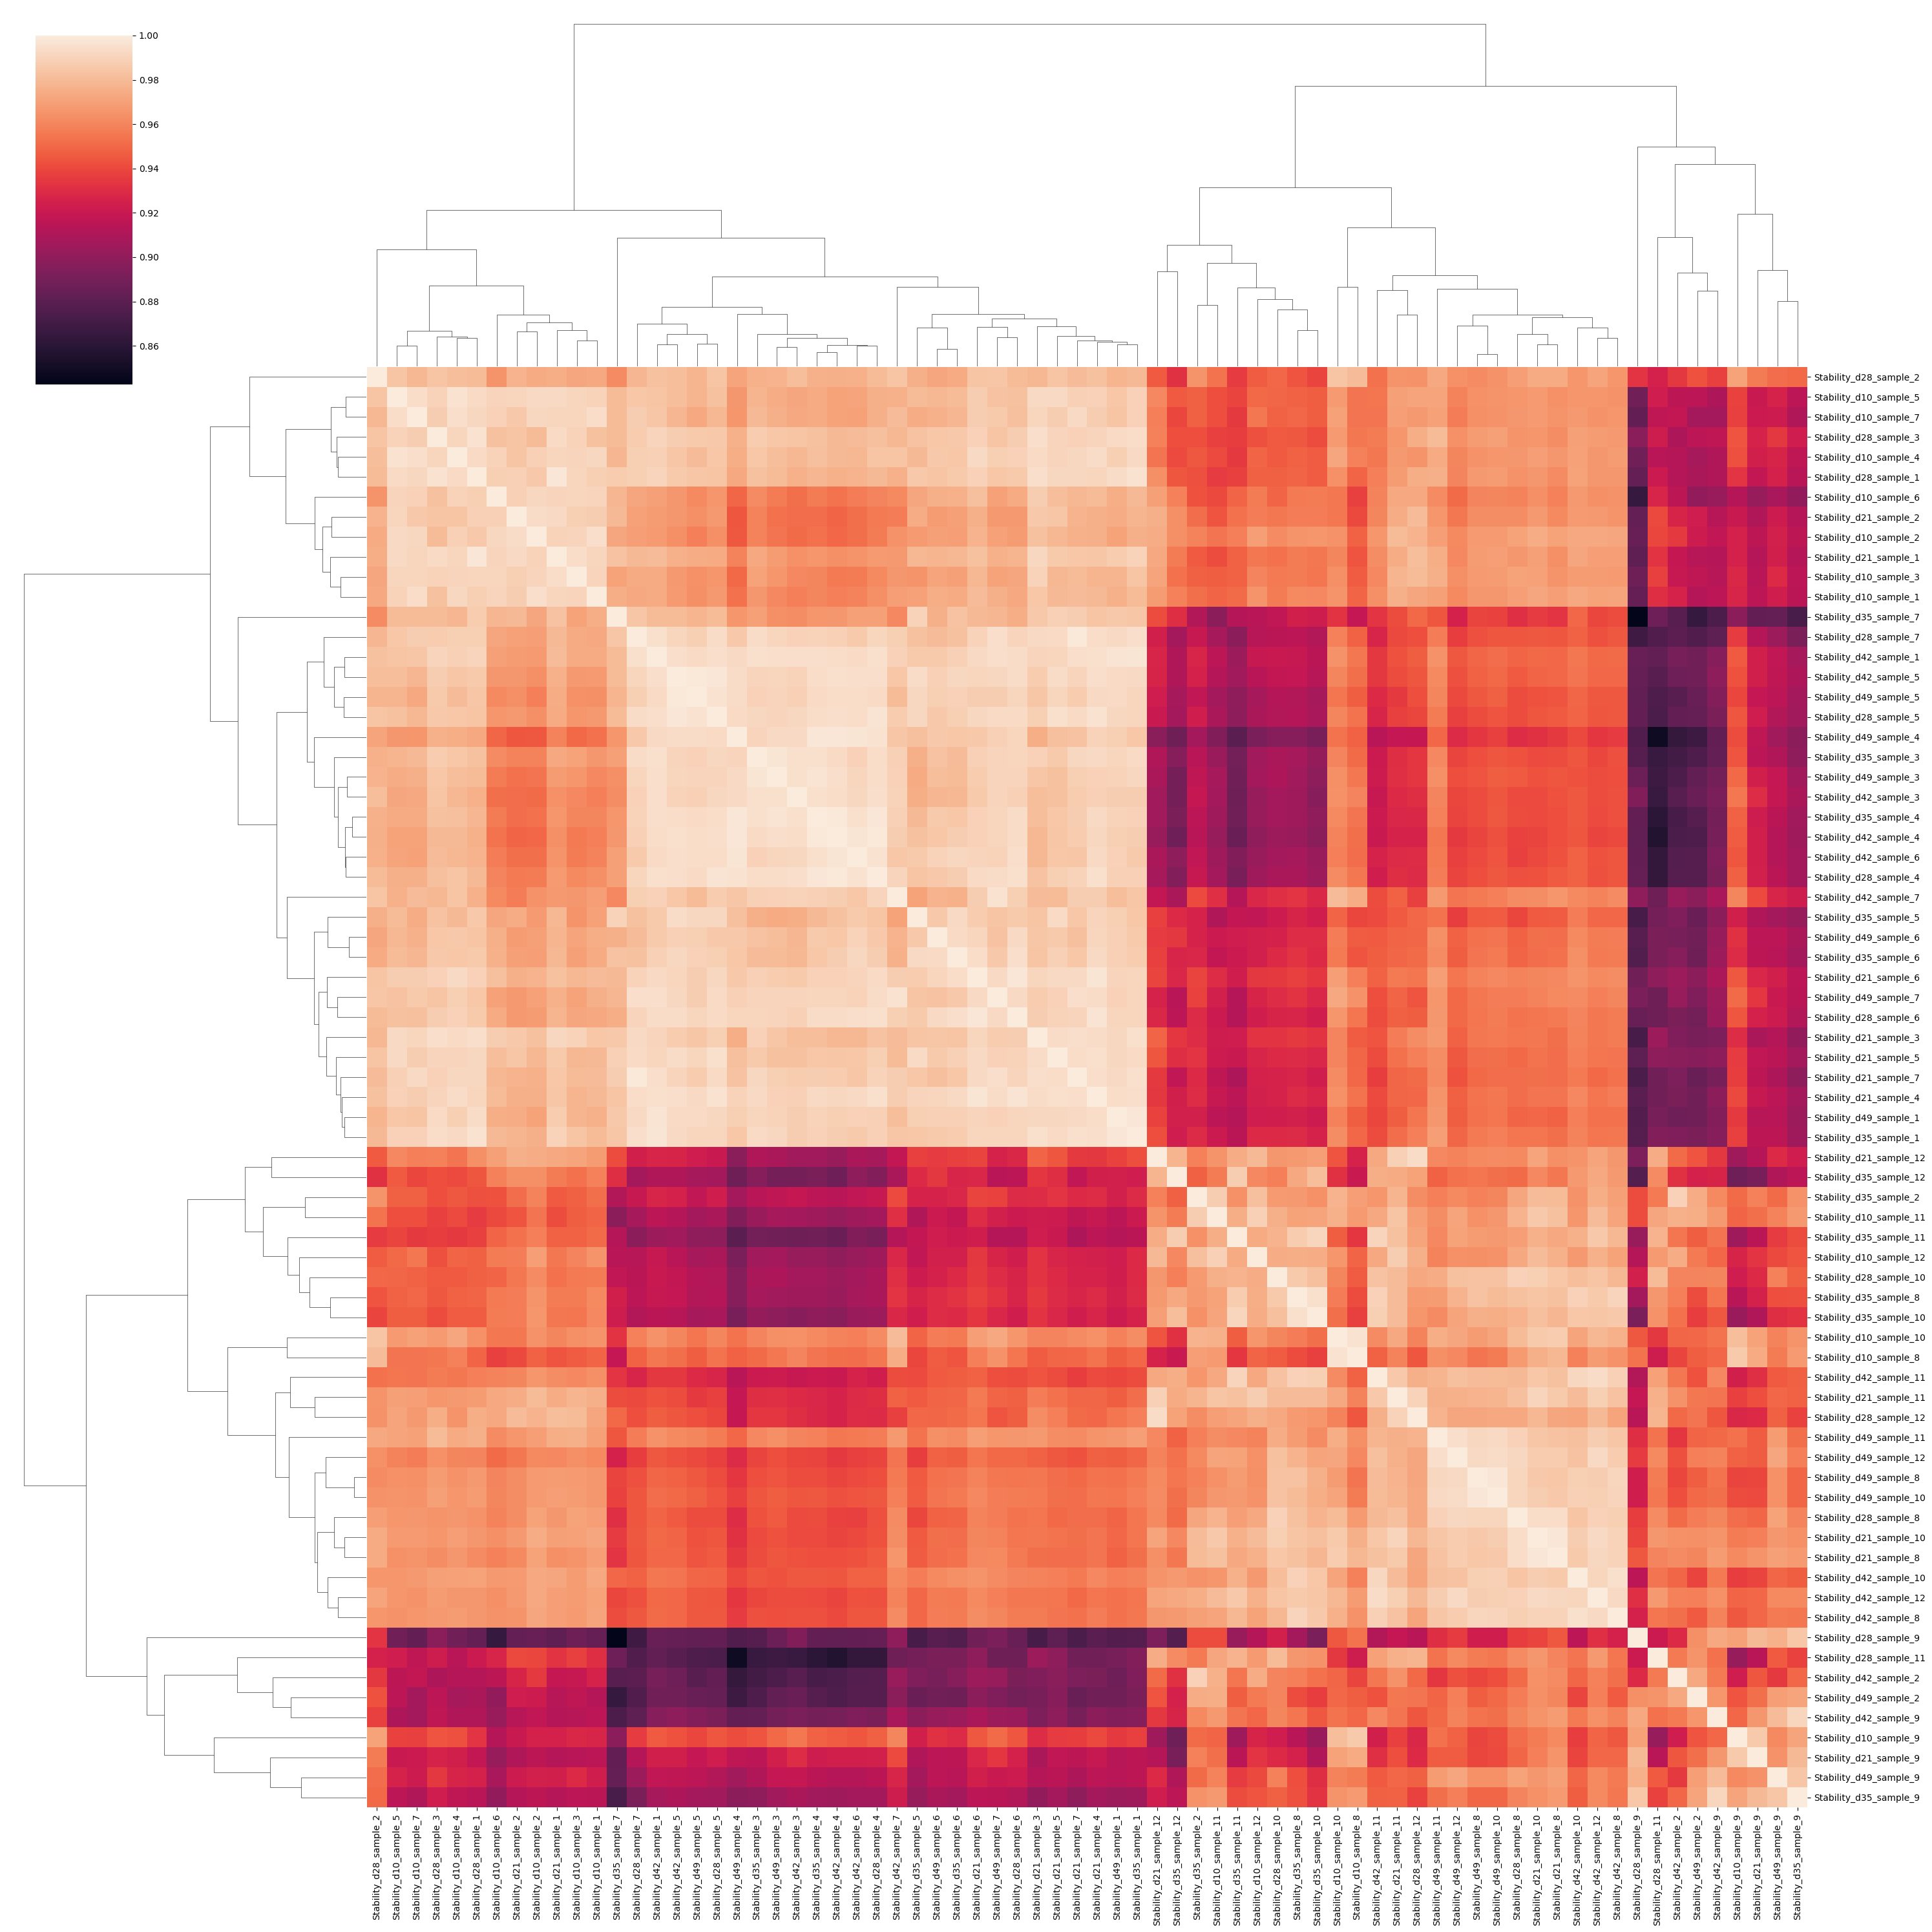

In [41]:
sns.clustermap(df_all_CPM.loc[var_genes].corr(),figsize=(30,30))

In [50]:
meta = pd.DataFrame(index=df_all_CPM.columns)
import re
meta['age'] = [re.sub("Stability_","",re.sub("_sample.*","",x)) for x in meta.index]
meta['sample'] = [re.sub(".*_sample_","",x) for x in meta.index]


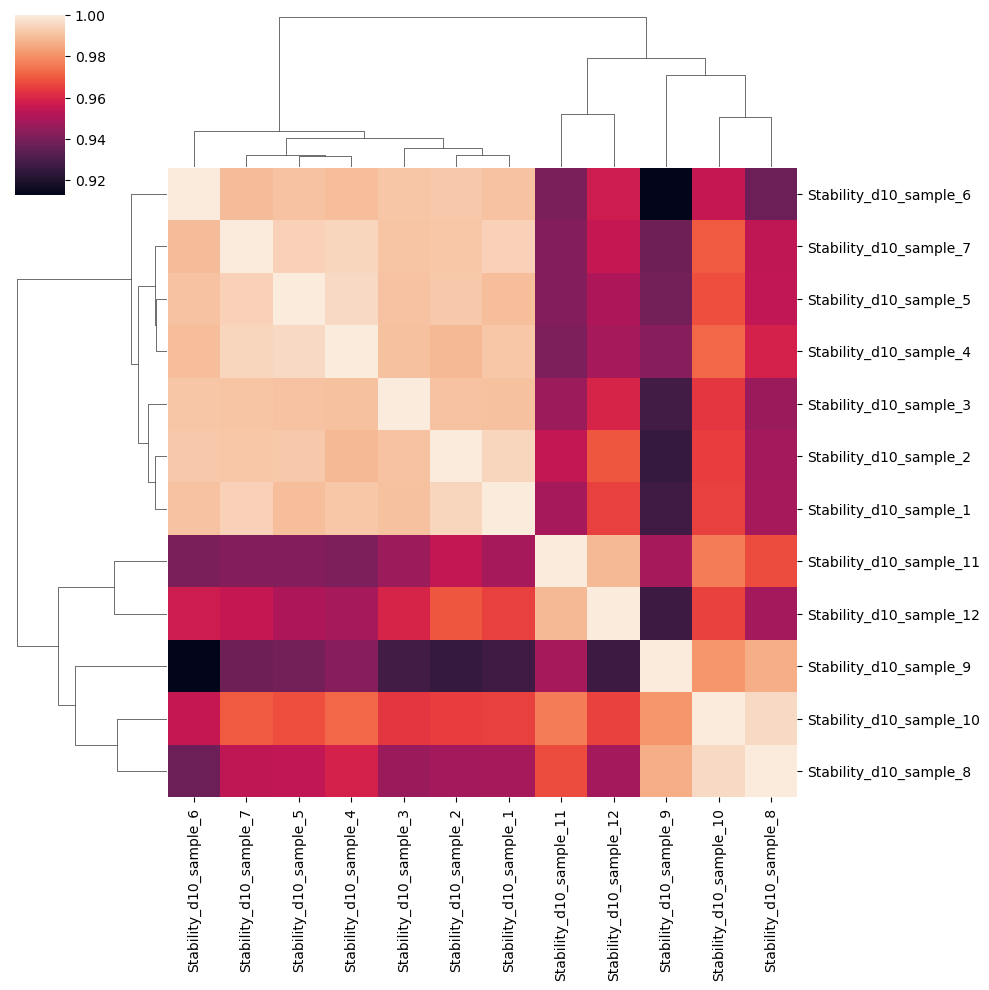

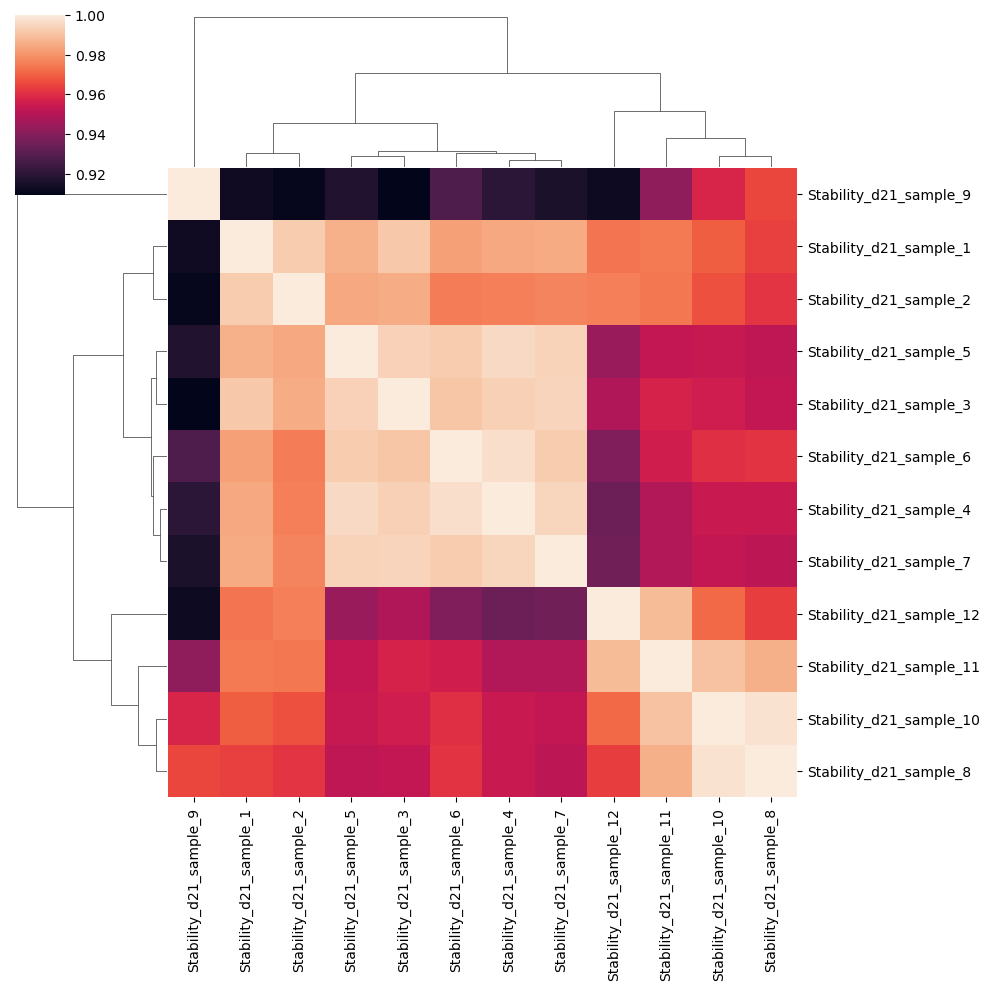

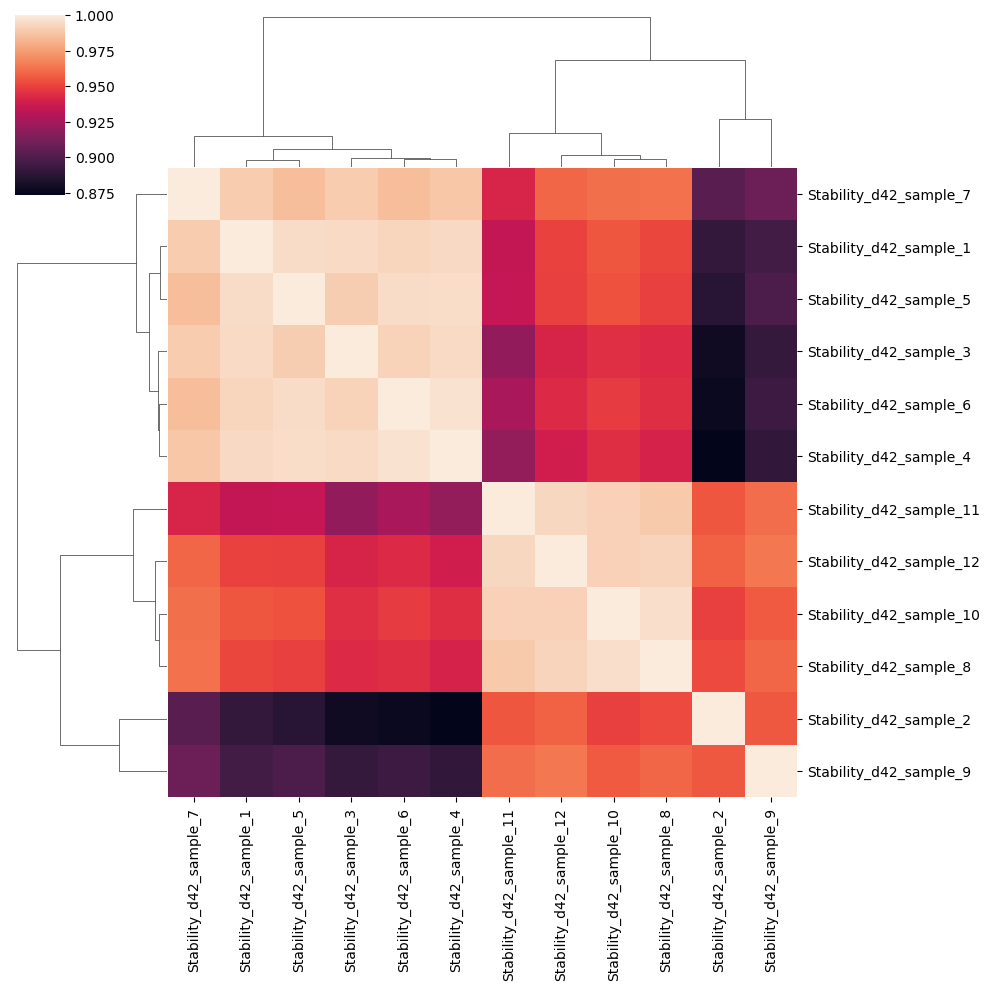

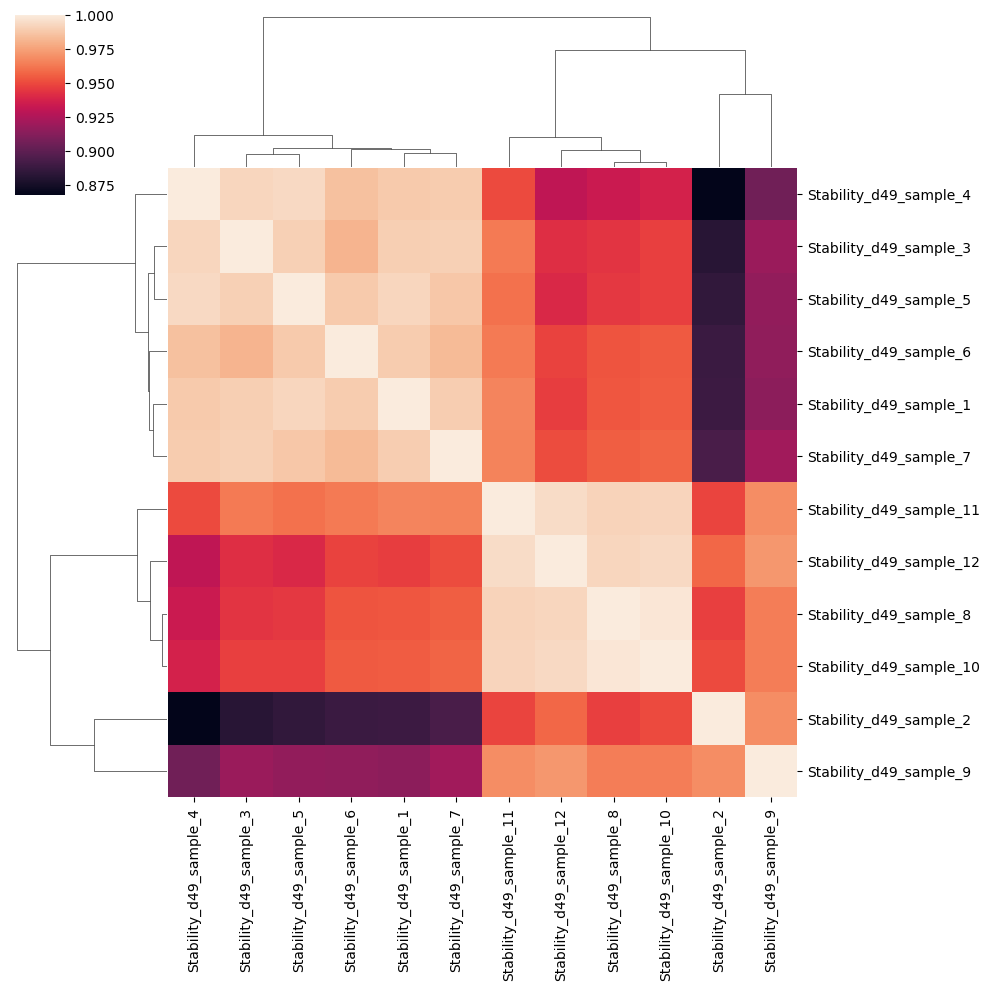

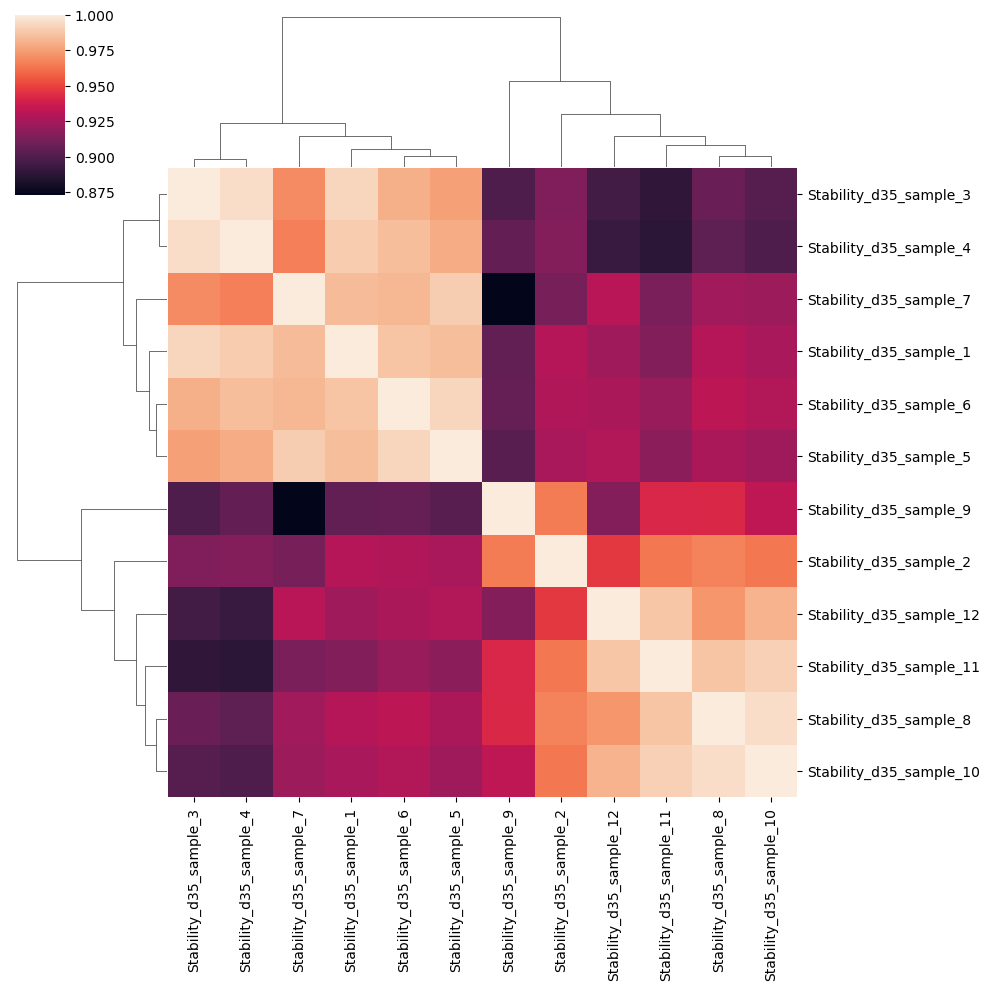

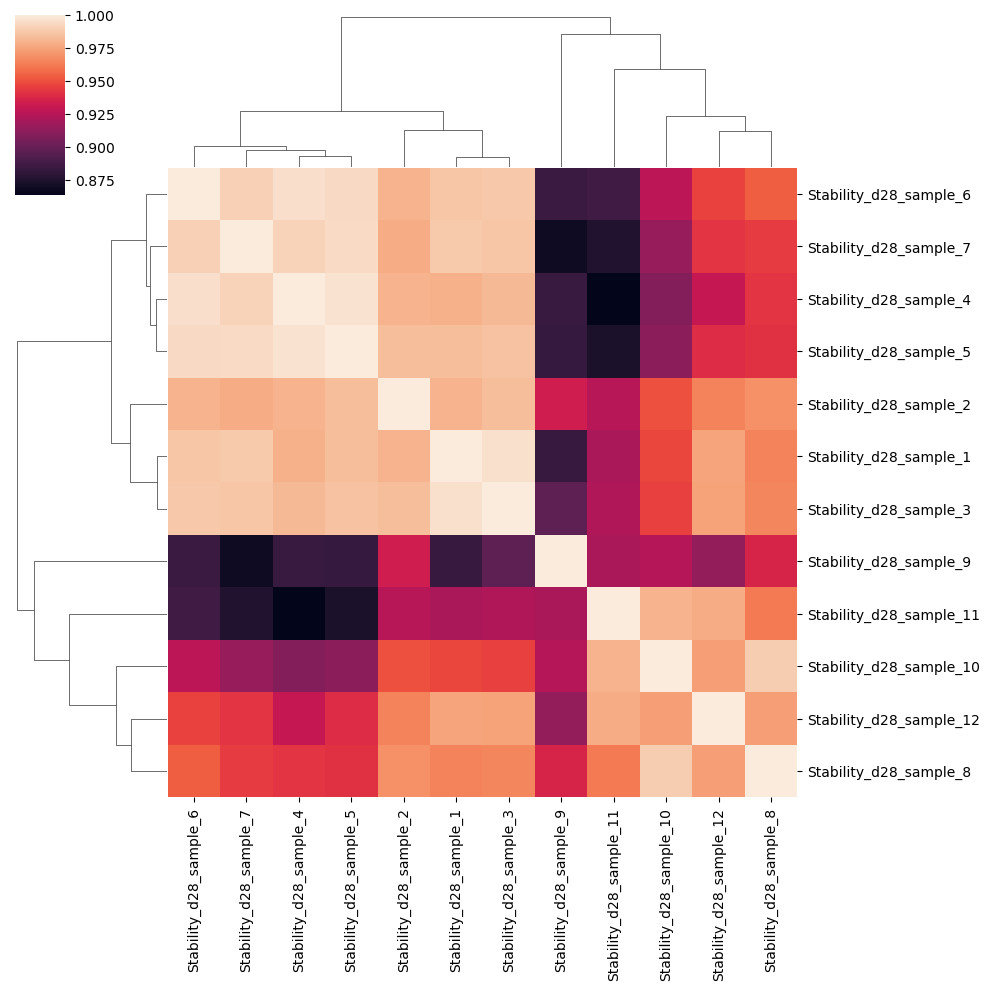

In [54]:
for age in list(set(meta['age'])):
    age_samples = meta.loc[meta['age']==age].index
    sns.clustermap(df_all_CPM.loc[var_genes,age_samples].corr(),figsize=(10,10))
    plt.show()
    plt.close()

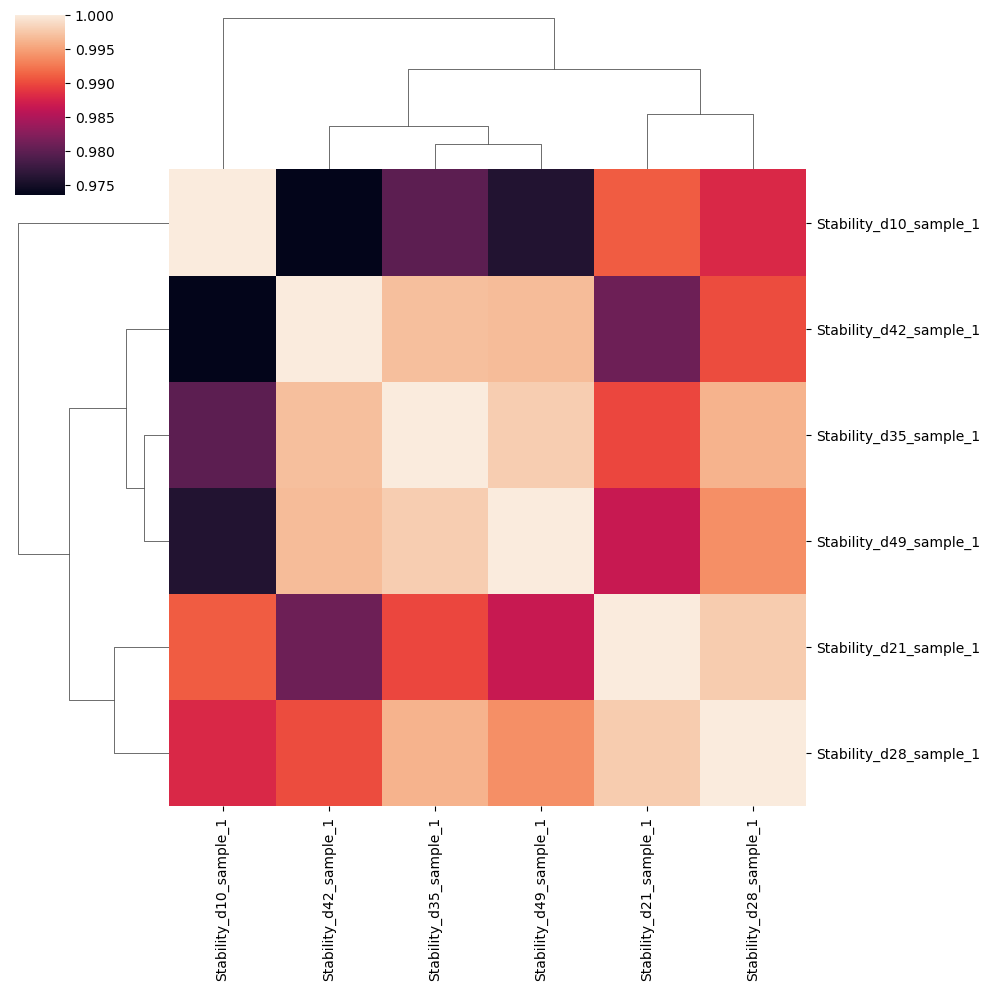

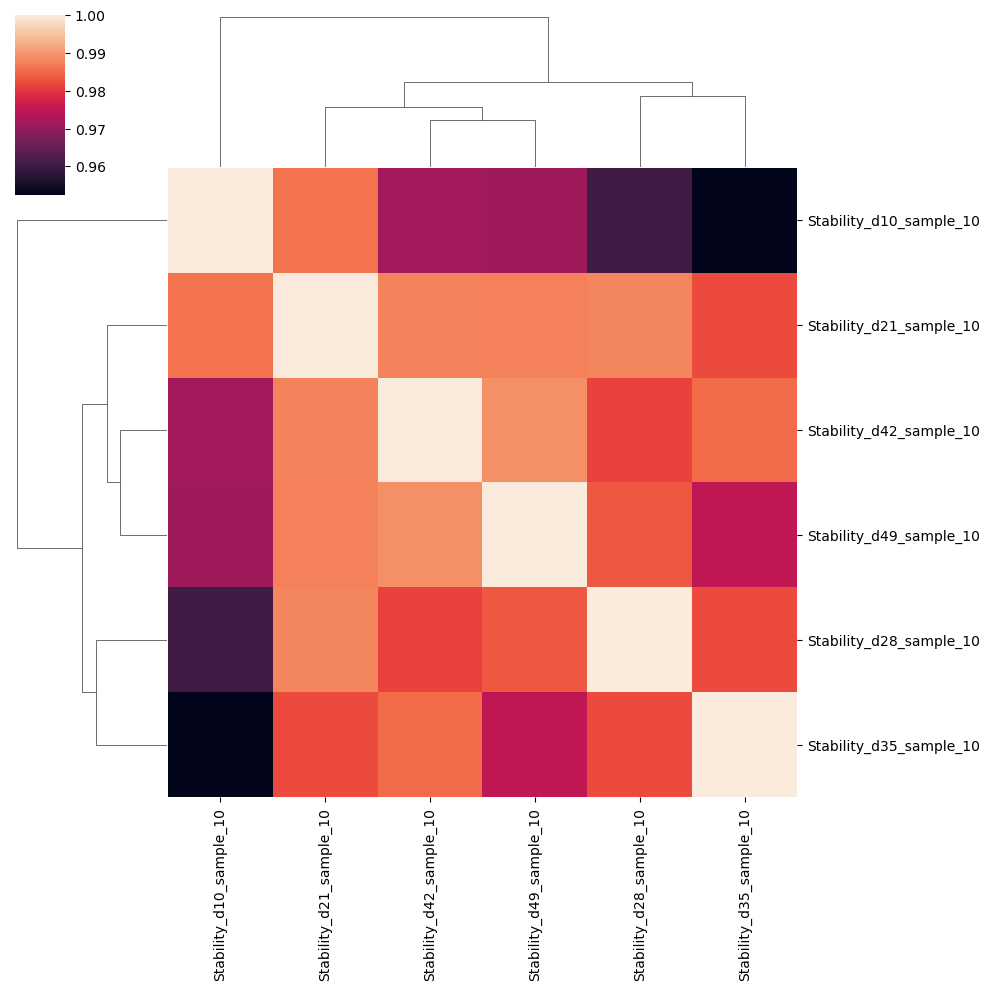

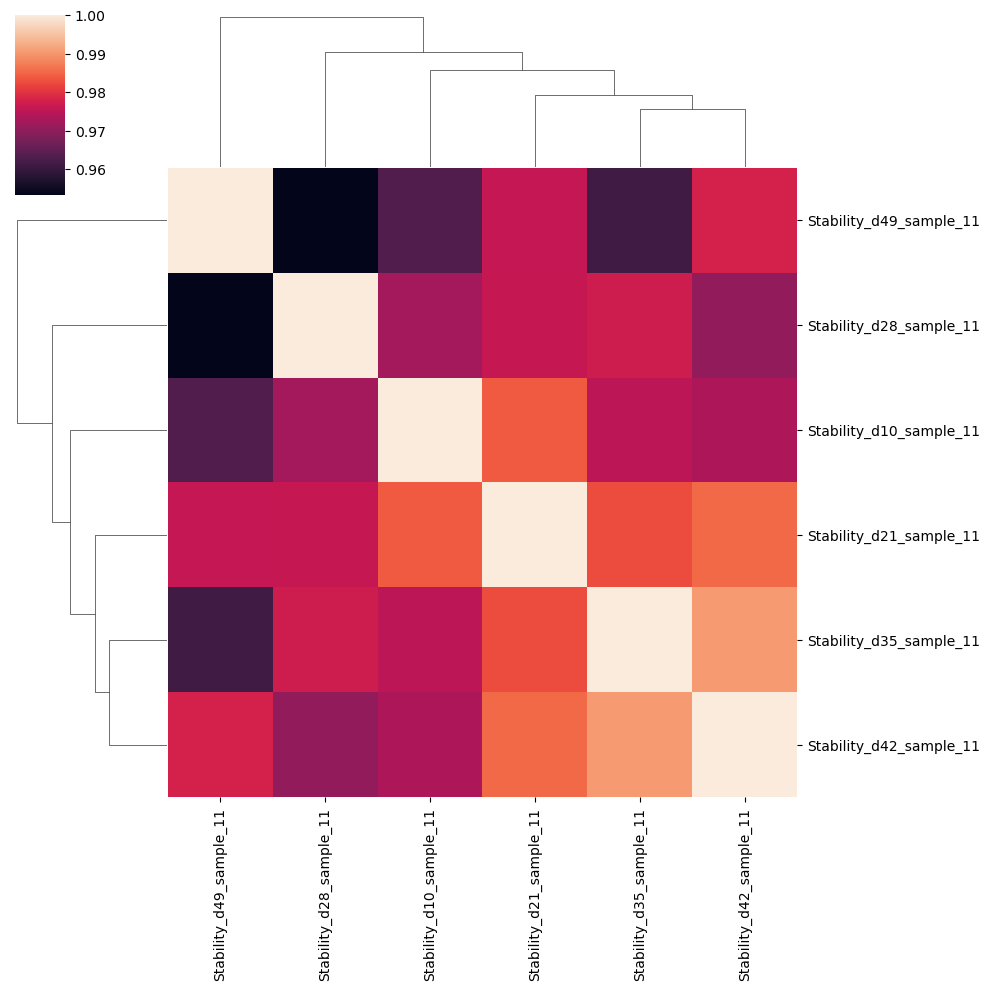

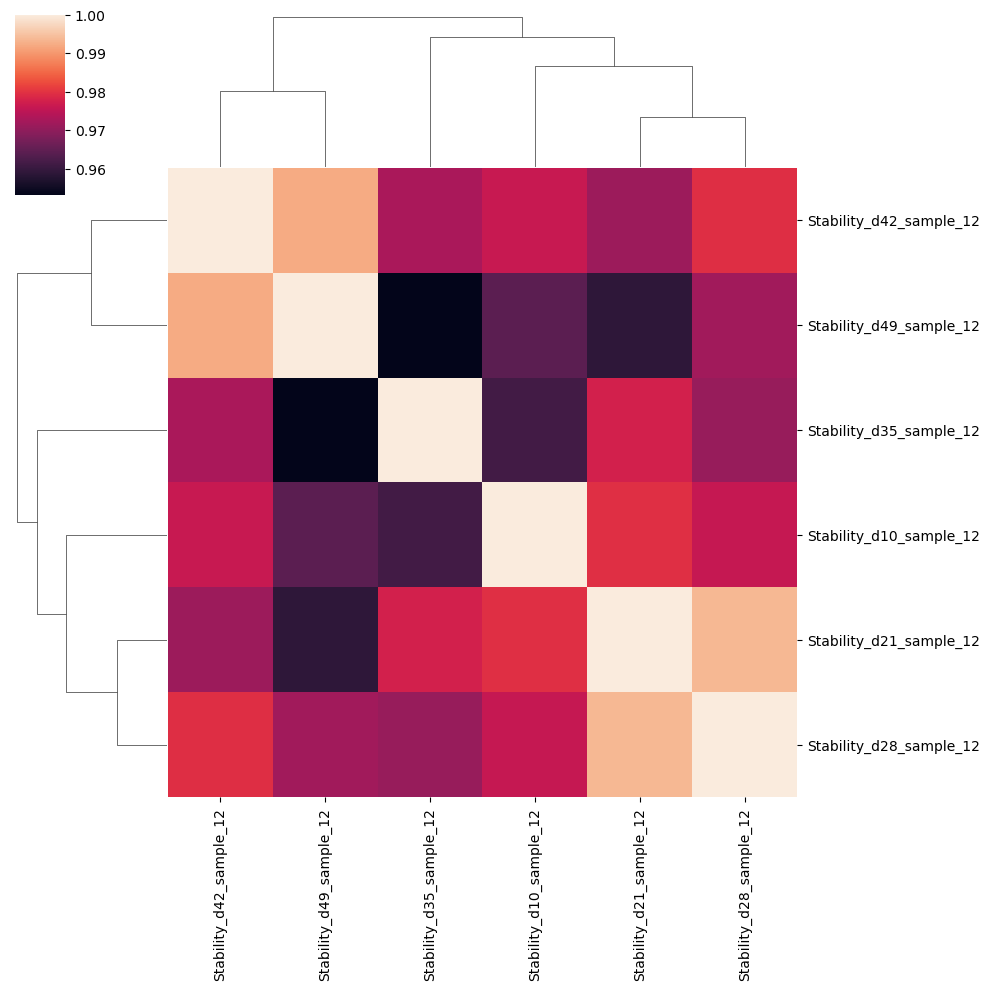

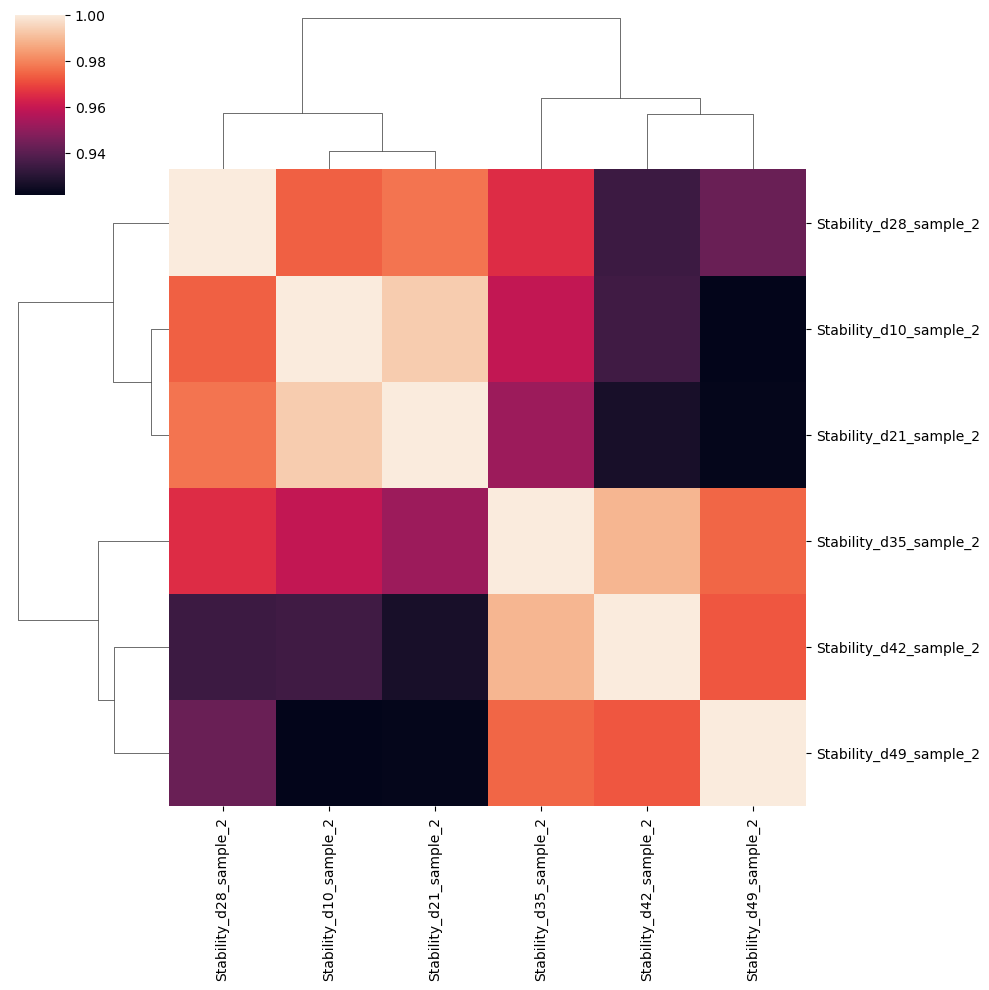

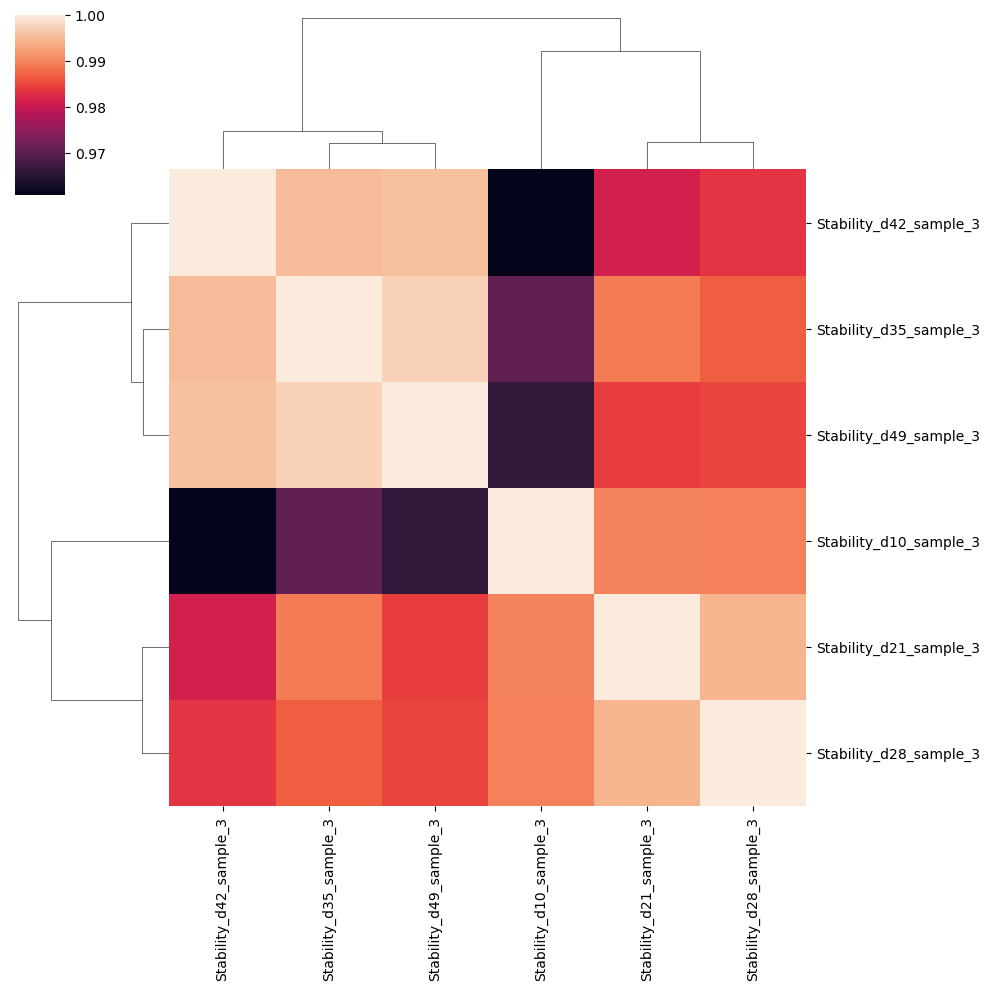

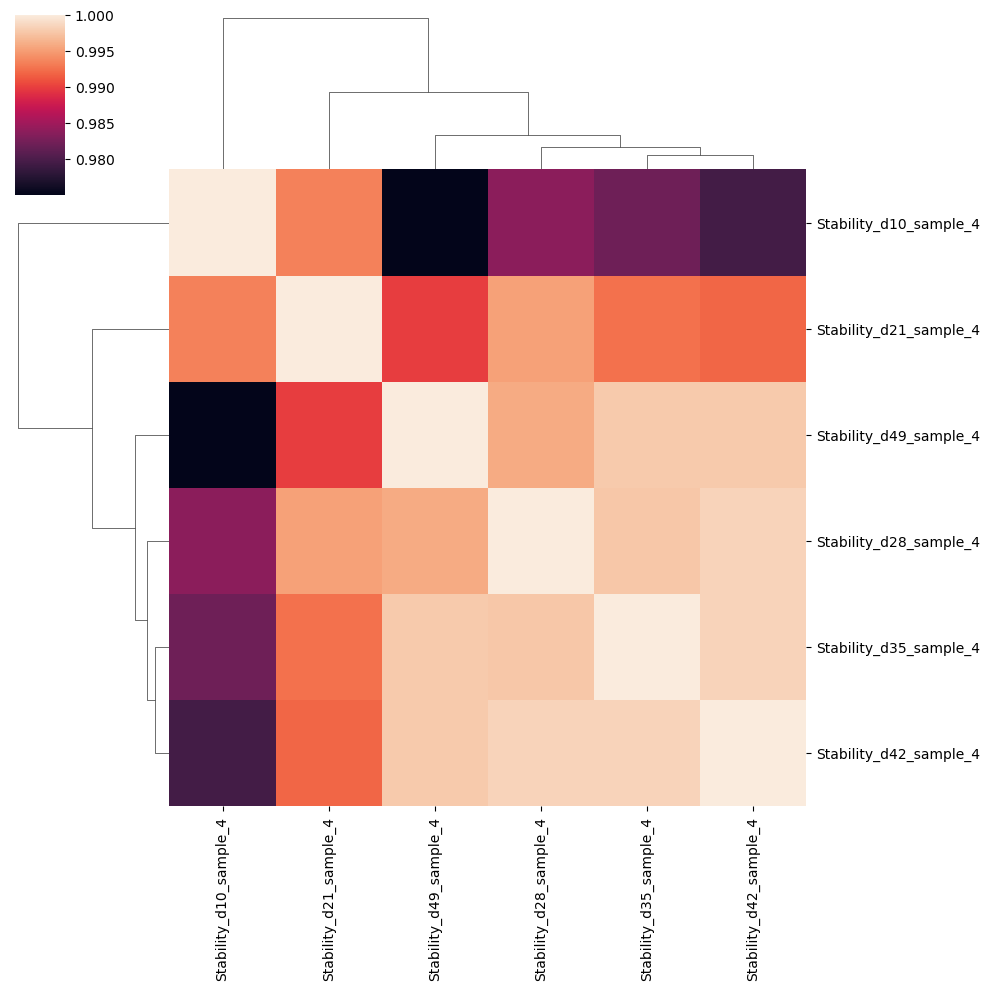

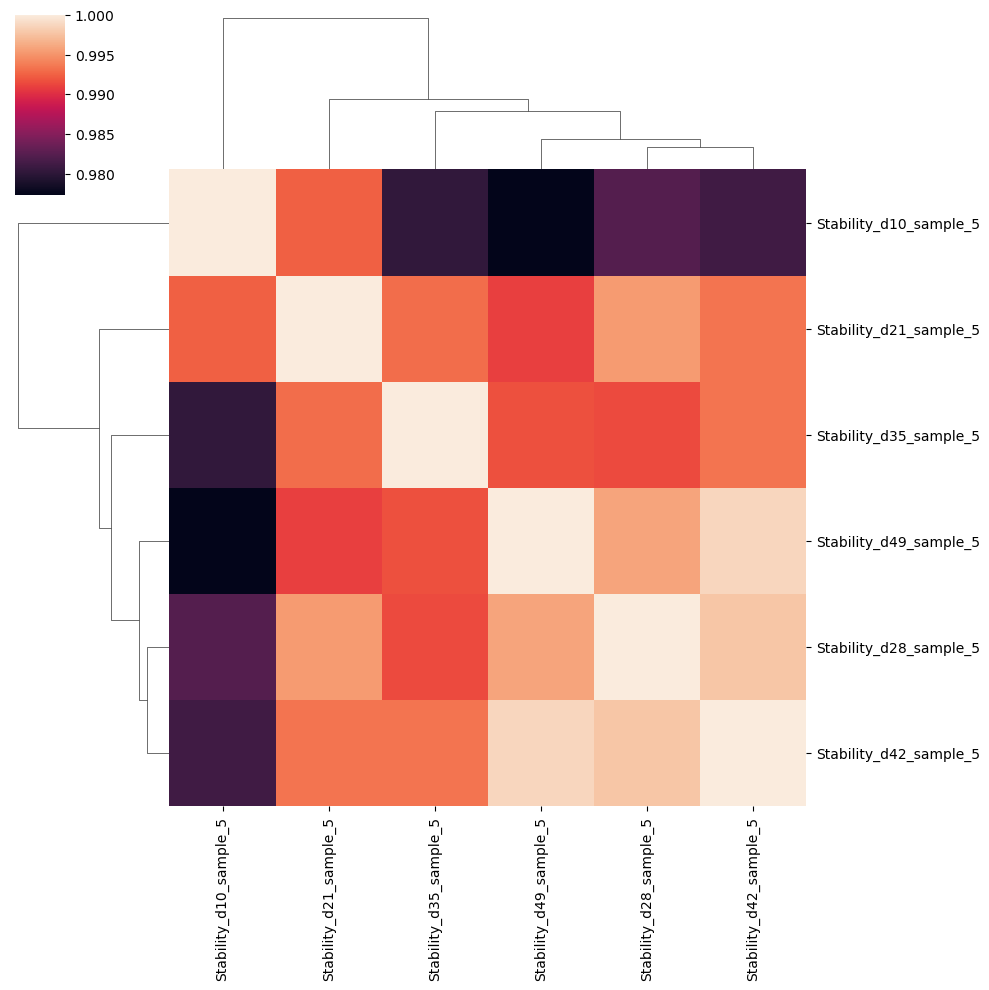

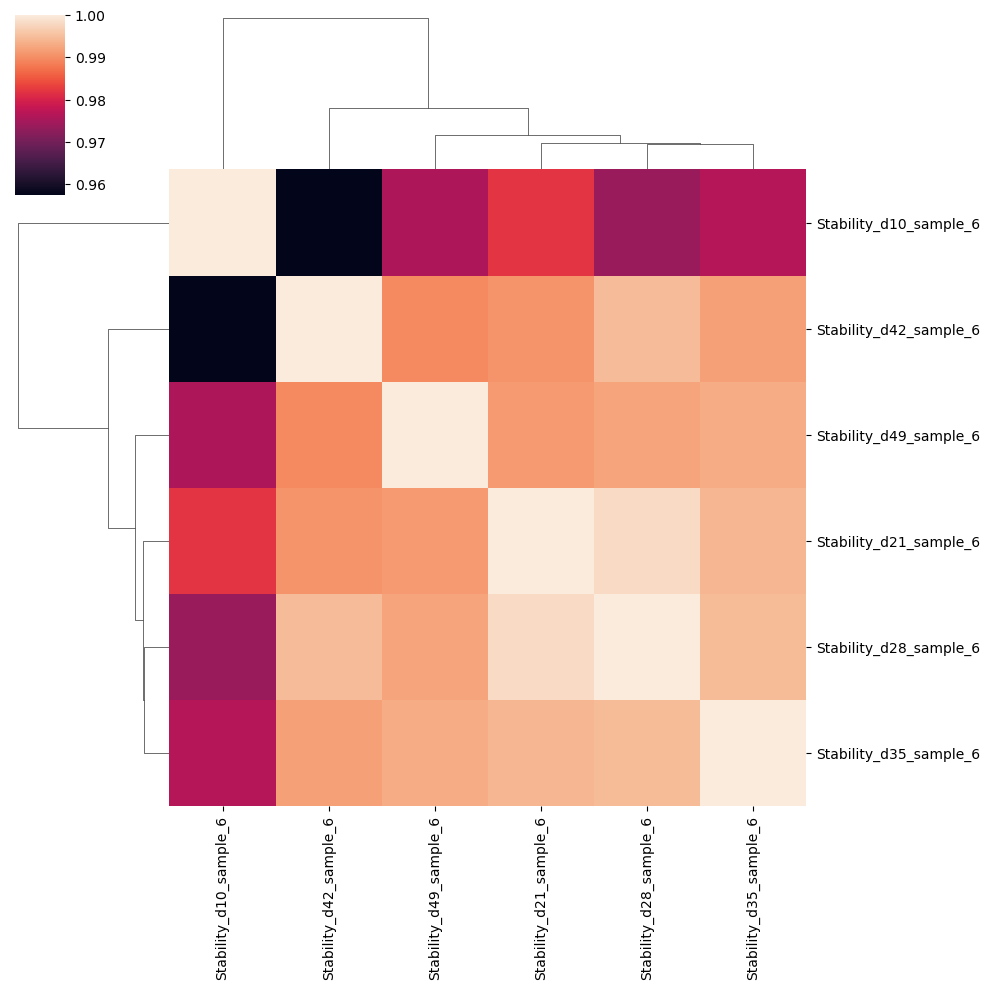

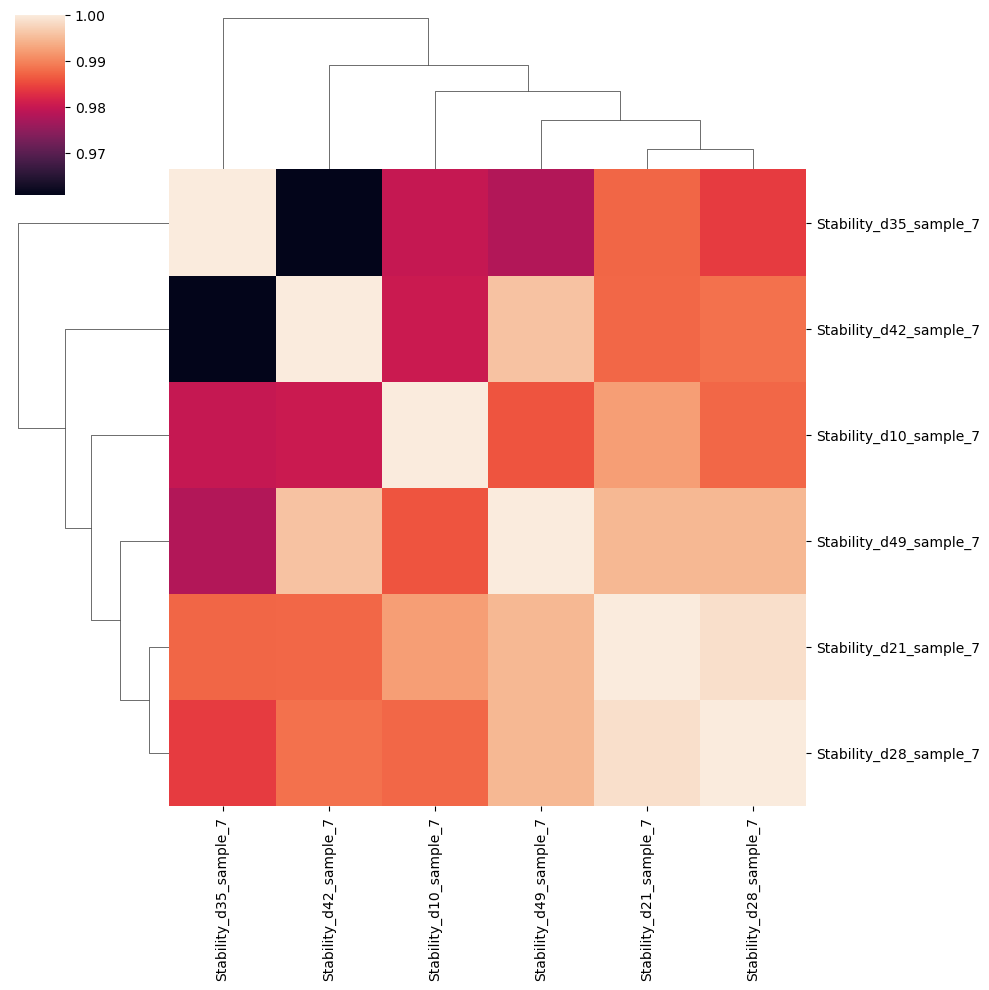

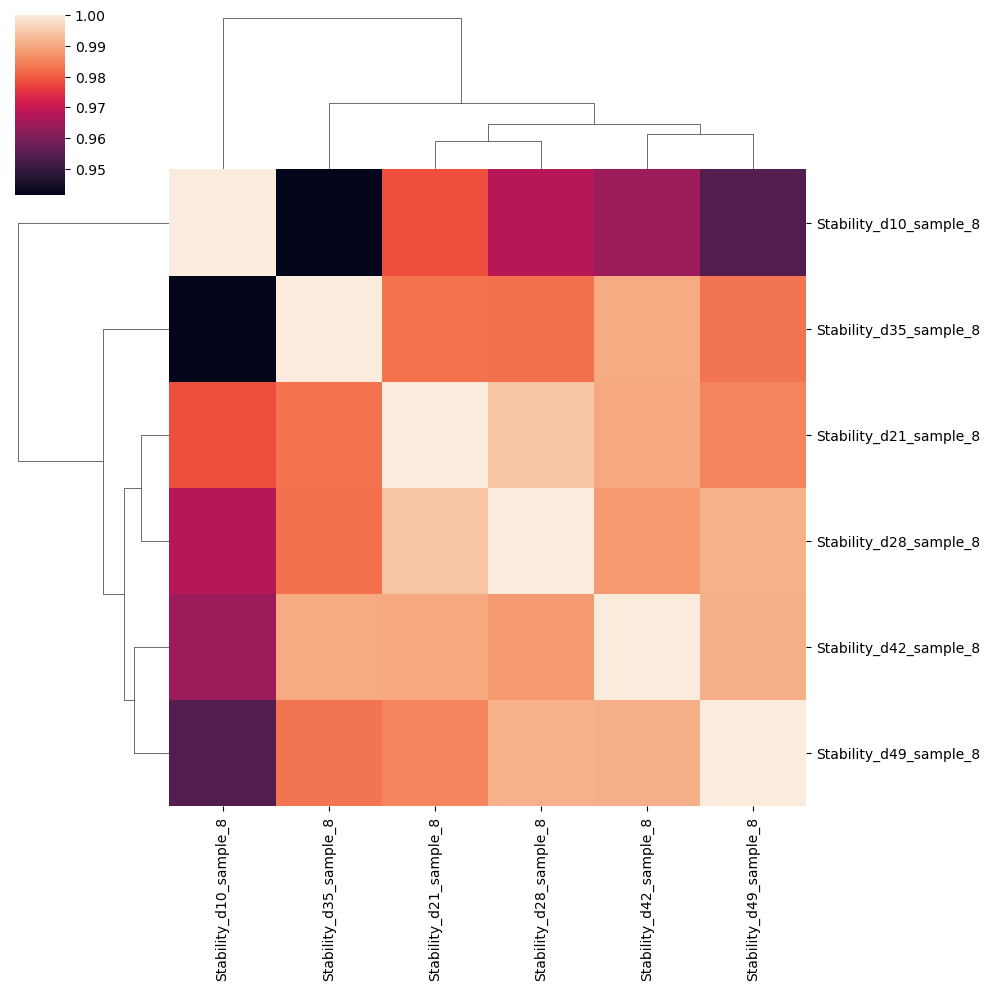

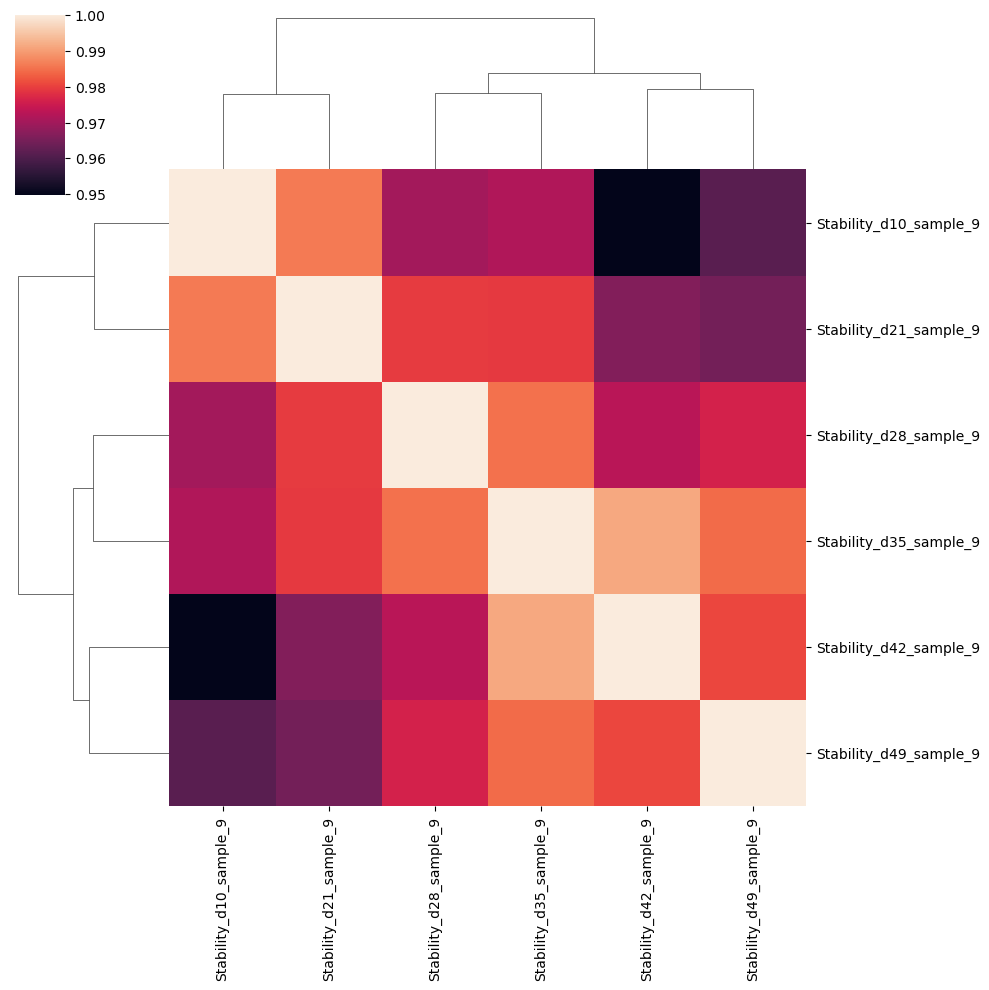

In [71]:
ordered_samples = []
meta = meta.sort_values(by=['sample','age'])

for sample in sorted(list(set(meta['sample']))):
    sample_samples = list(meta.loc[meta['sample']==sample].index)
    sns.clustermap(df_all_CPM.loc[var_genes,sample_samples].corr(),figsize=(10,10))
    plt.show()
    plt.close()

    ordered_samples = ordered_samples + sample_samples

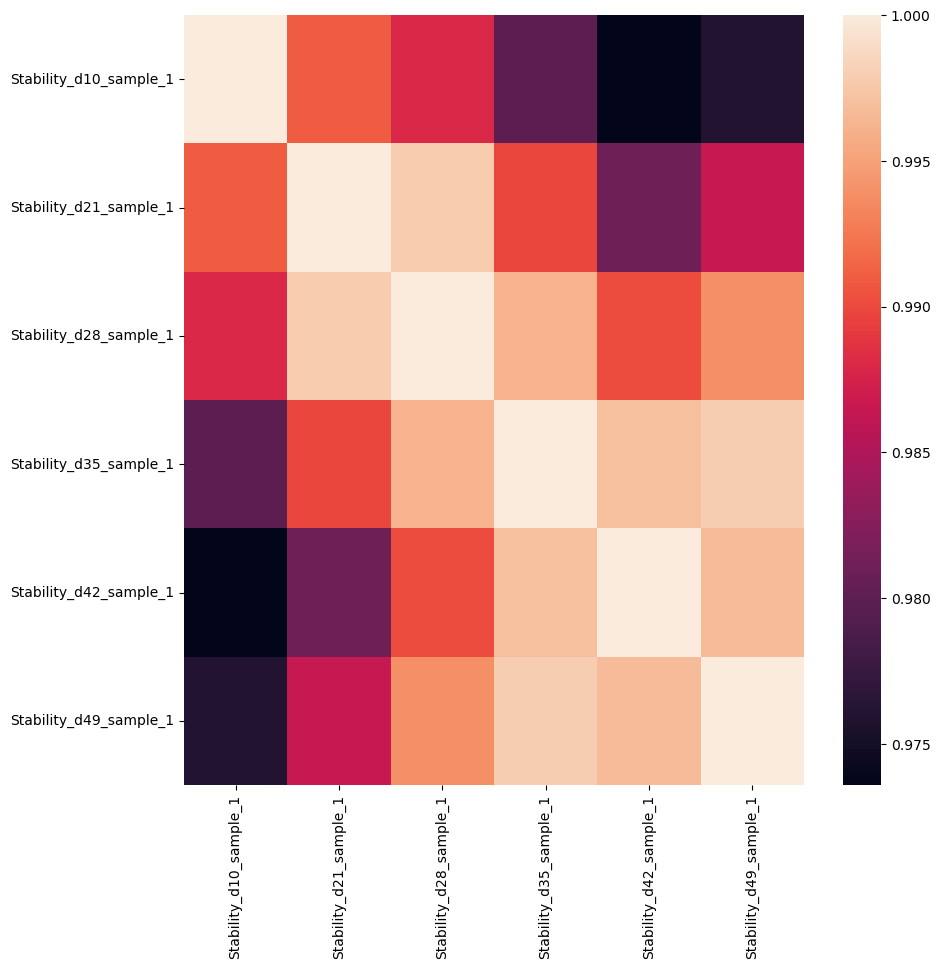

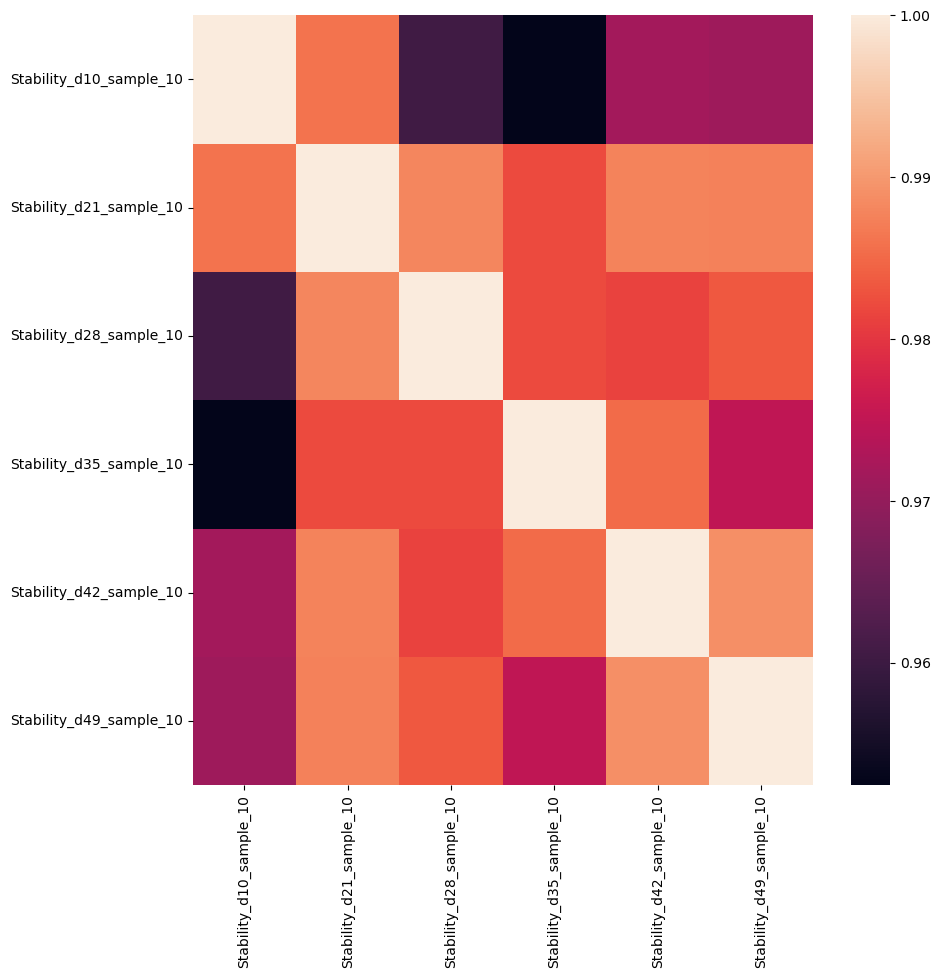

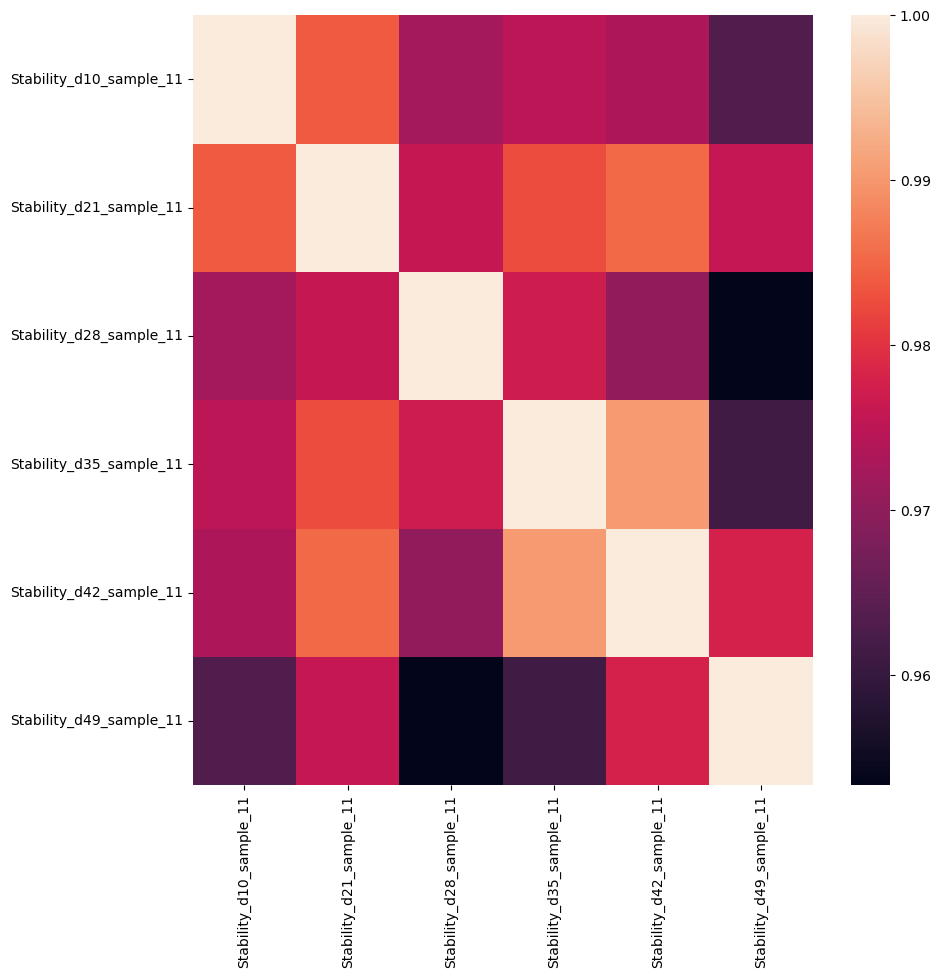

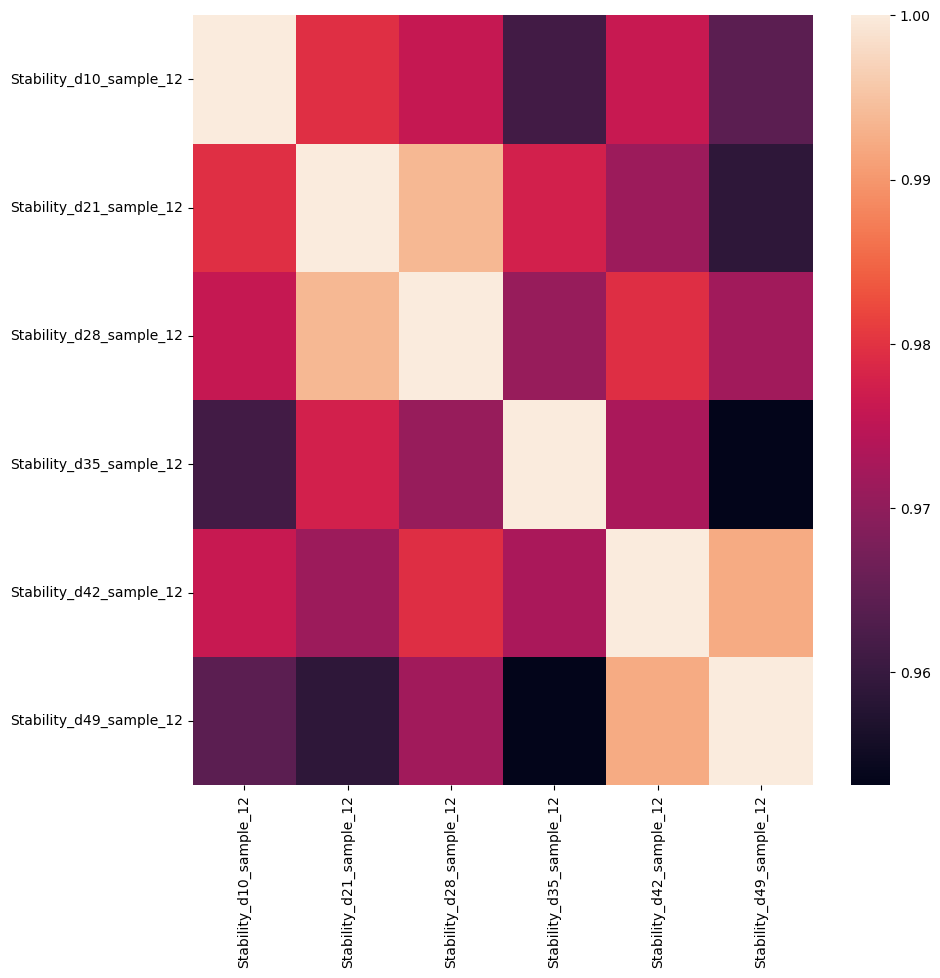

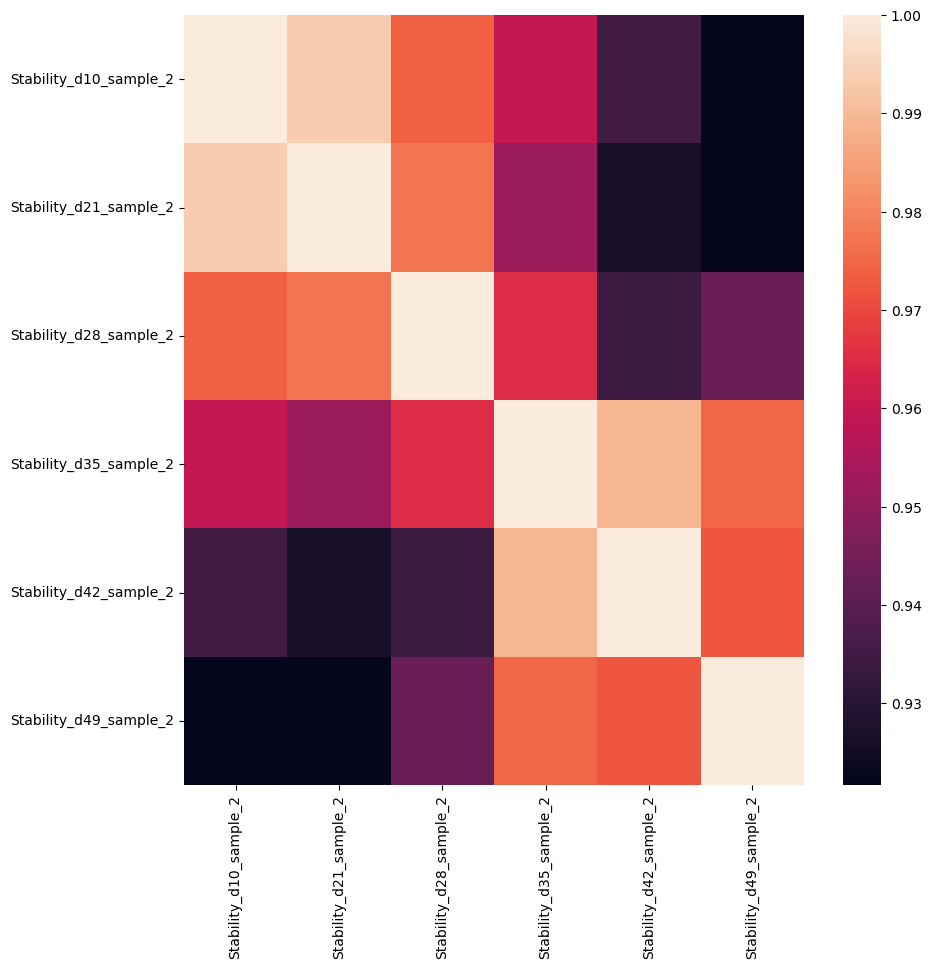

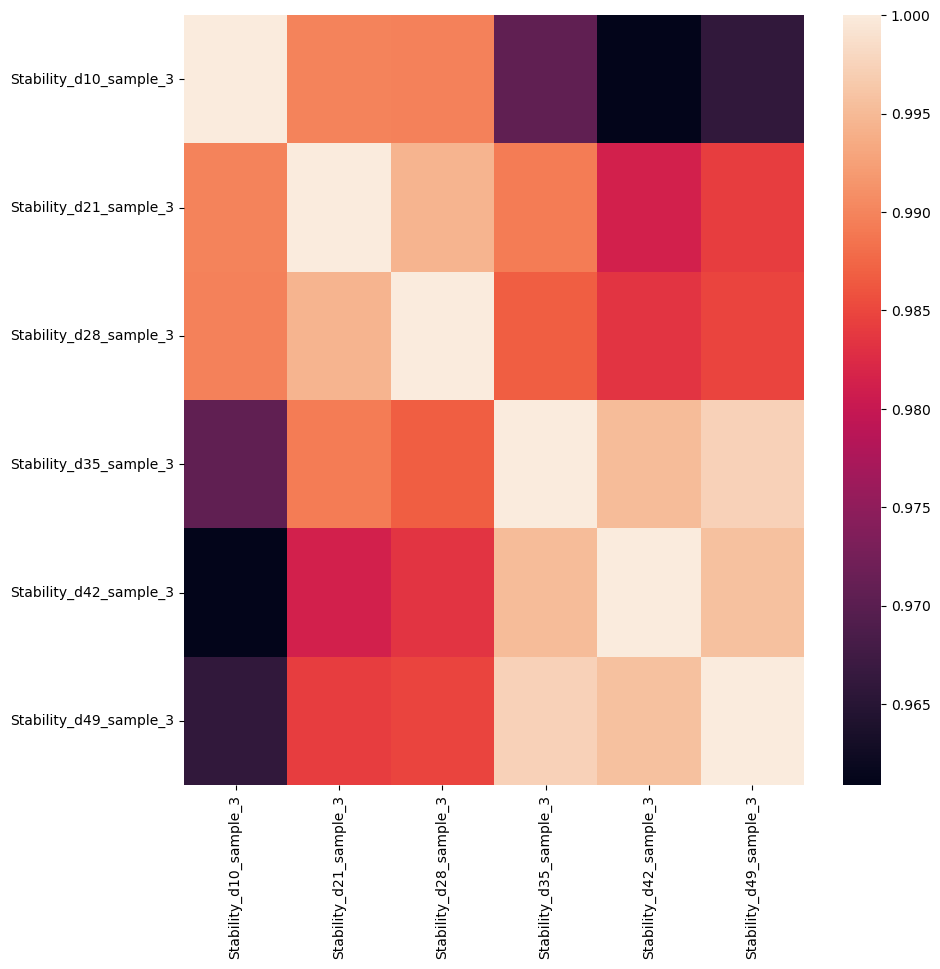

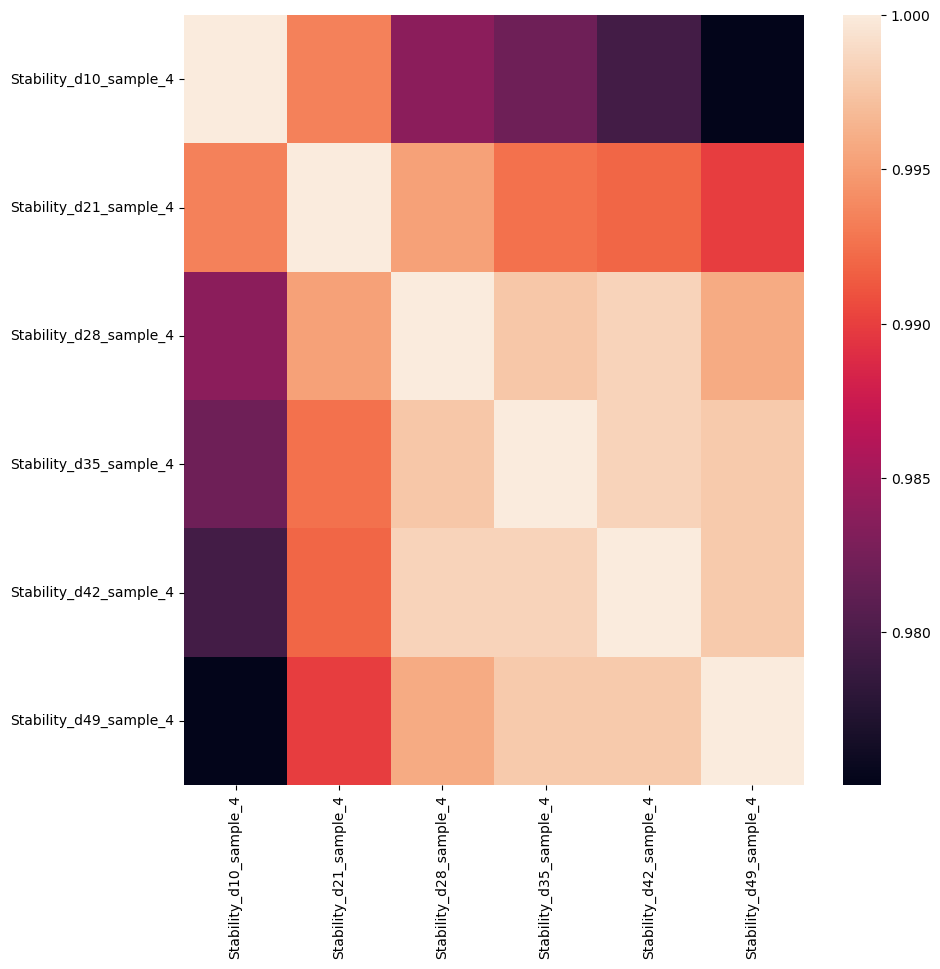

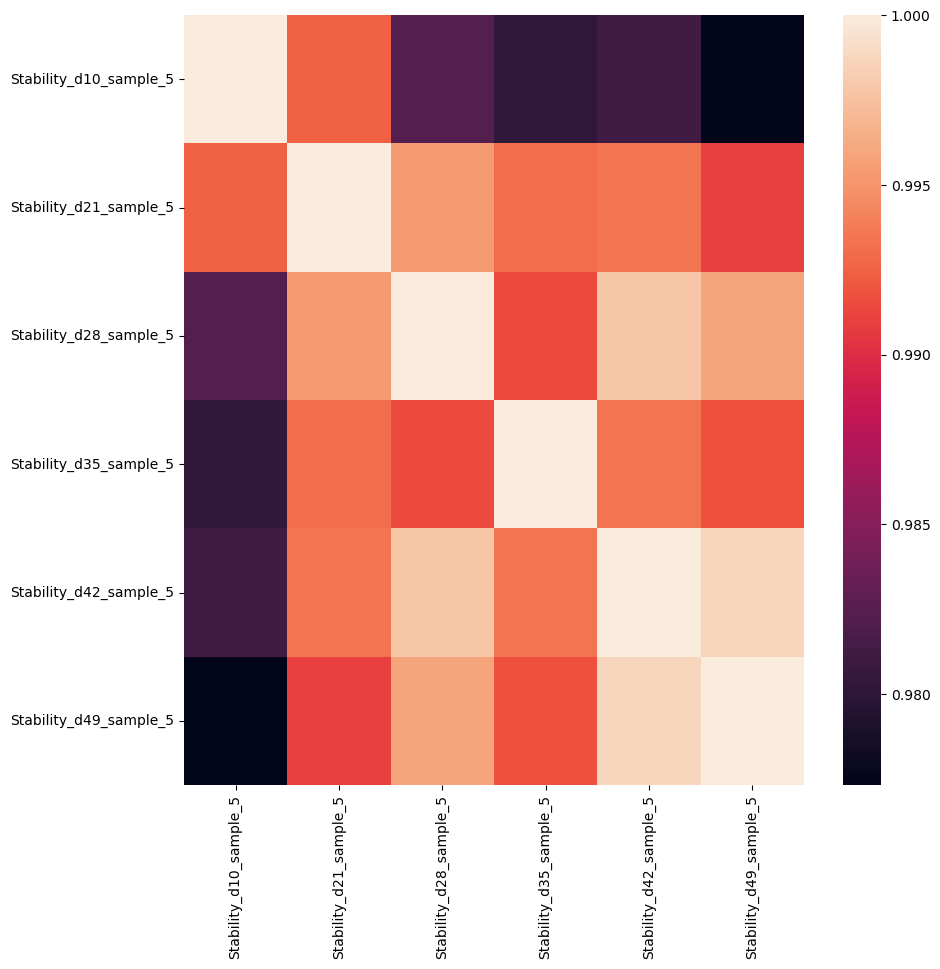

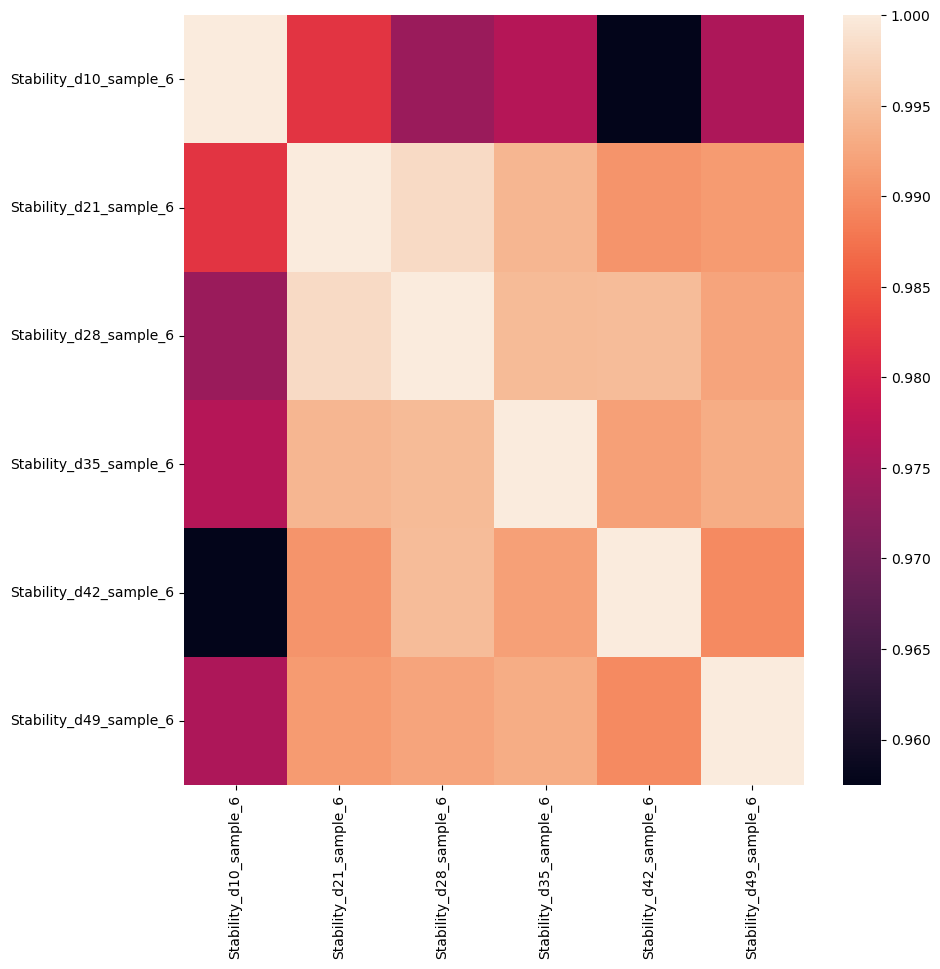

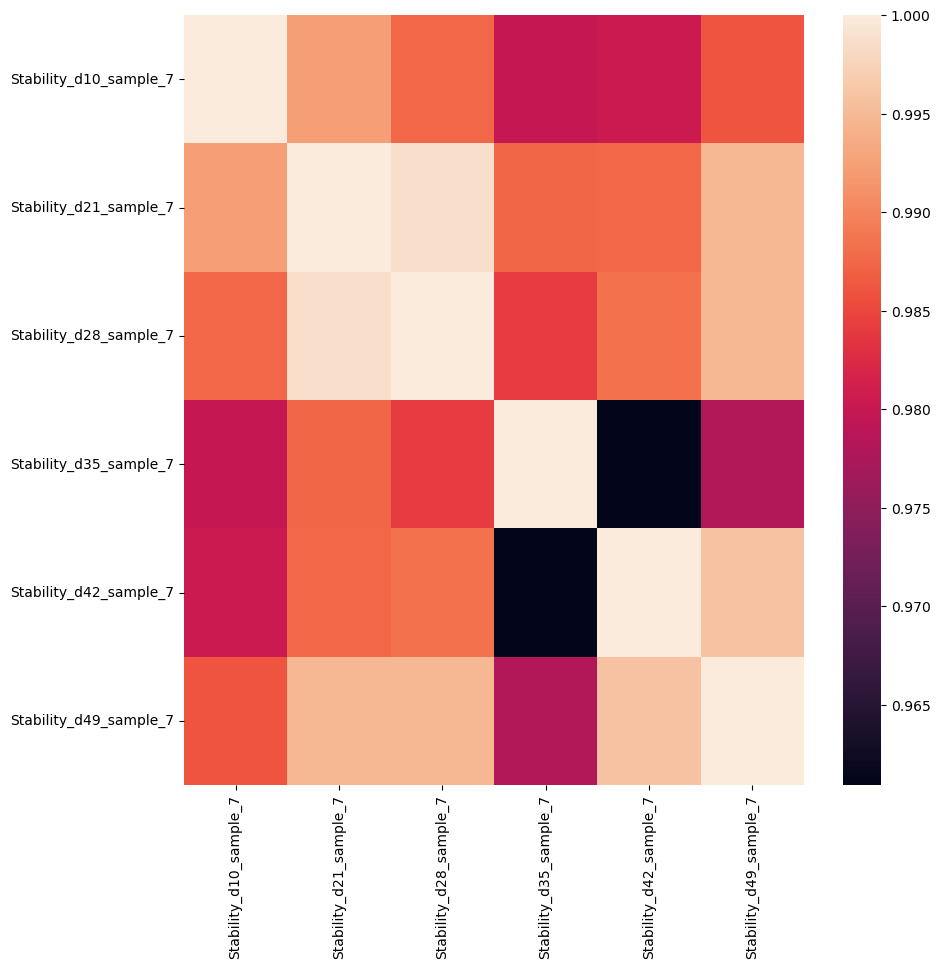

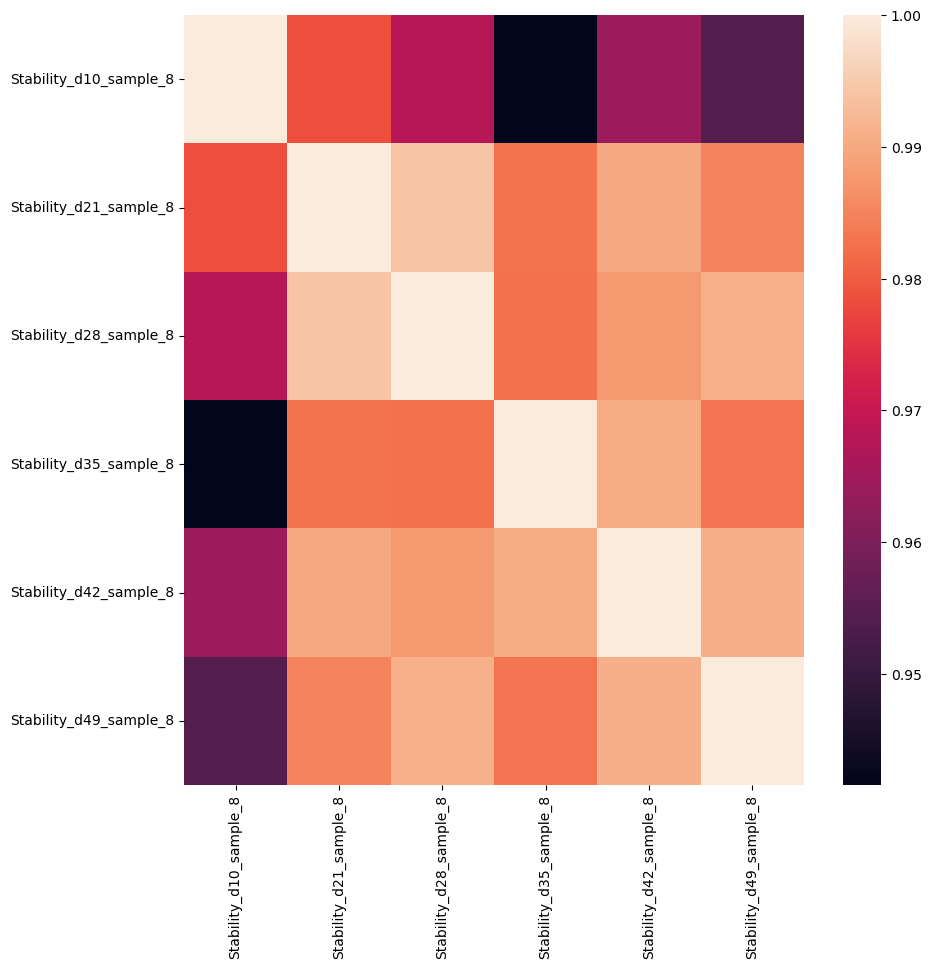

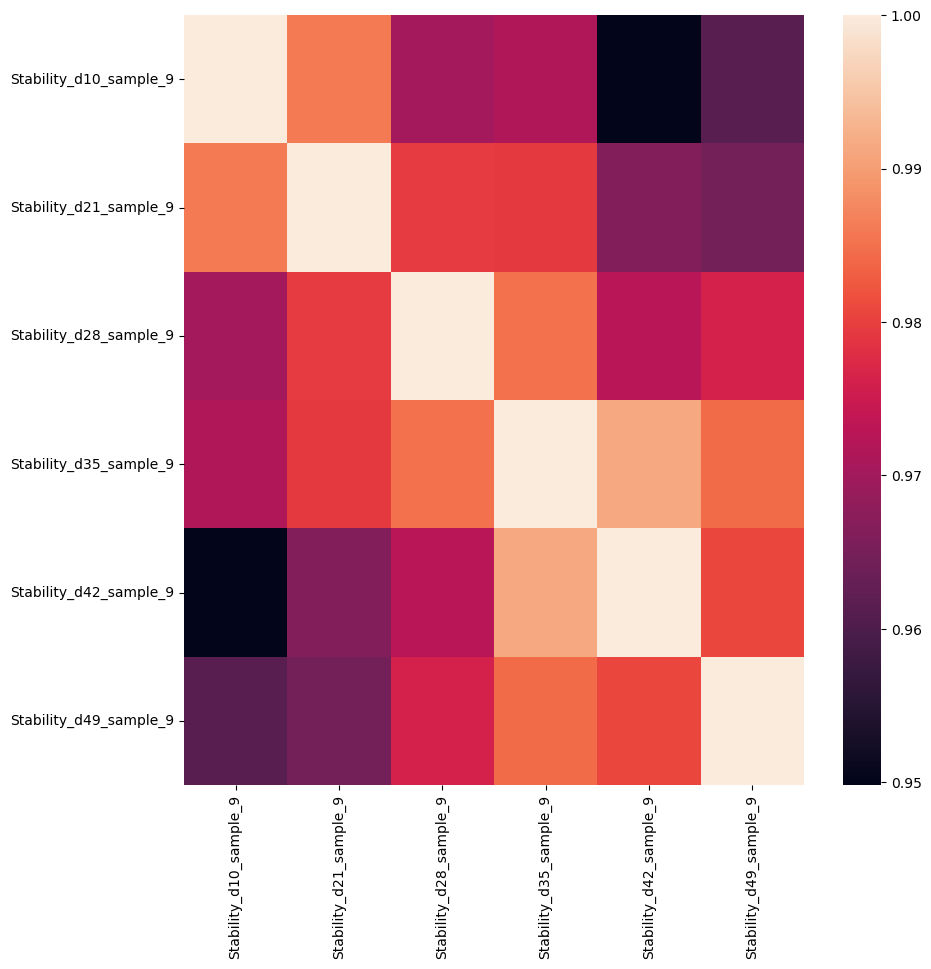

In [108]:
ordered_samples = []
meta = meta.sort_values(by=['sample','age'])
a_min = []
for sample in sorted(list(set(meta['sample']))):
    sample_samples = list(meta.loc[meta['sample']==sample].index)
    plt.figure(figsize=(10,10))
    sns.heatmap(df_all_CPM.loc[var_genes,sample_samples].corr(),vmin=0.92,vmax=1)
    plt.savefig("stability_plots/sample_"+sample+"_timepoints_corr_variablegenes.png",dpi=350,bbox_inches='tight',pad_inches=0)
    plt.show()
    plt.close()

    ordered_samples = ordered_samples + sample_samples

    a_min.append(df_all_CPM.loc[var_genes,sample_samples].corr().min().min())

0.9735775127377414
0.9524257824562231
0.9533085064017714
0.9531277221718979
0.9216863834122349
0.9608759256945191
0.9750512680694298
0.9773160758721067
0.9574841888976291
0.9609194813482748
0.9415618955302942
0.9498040766735429


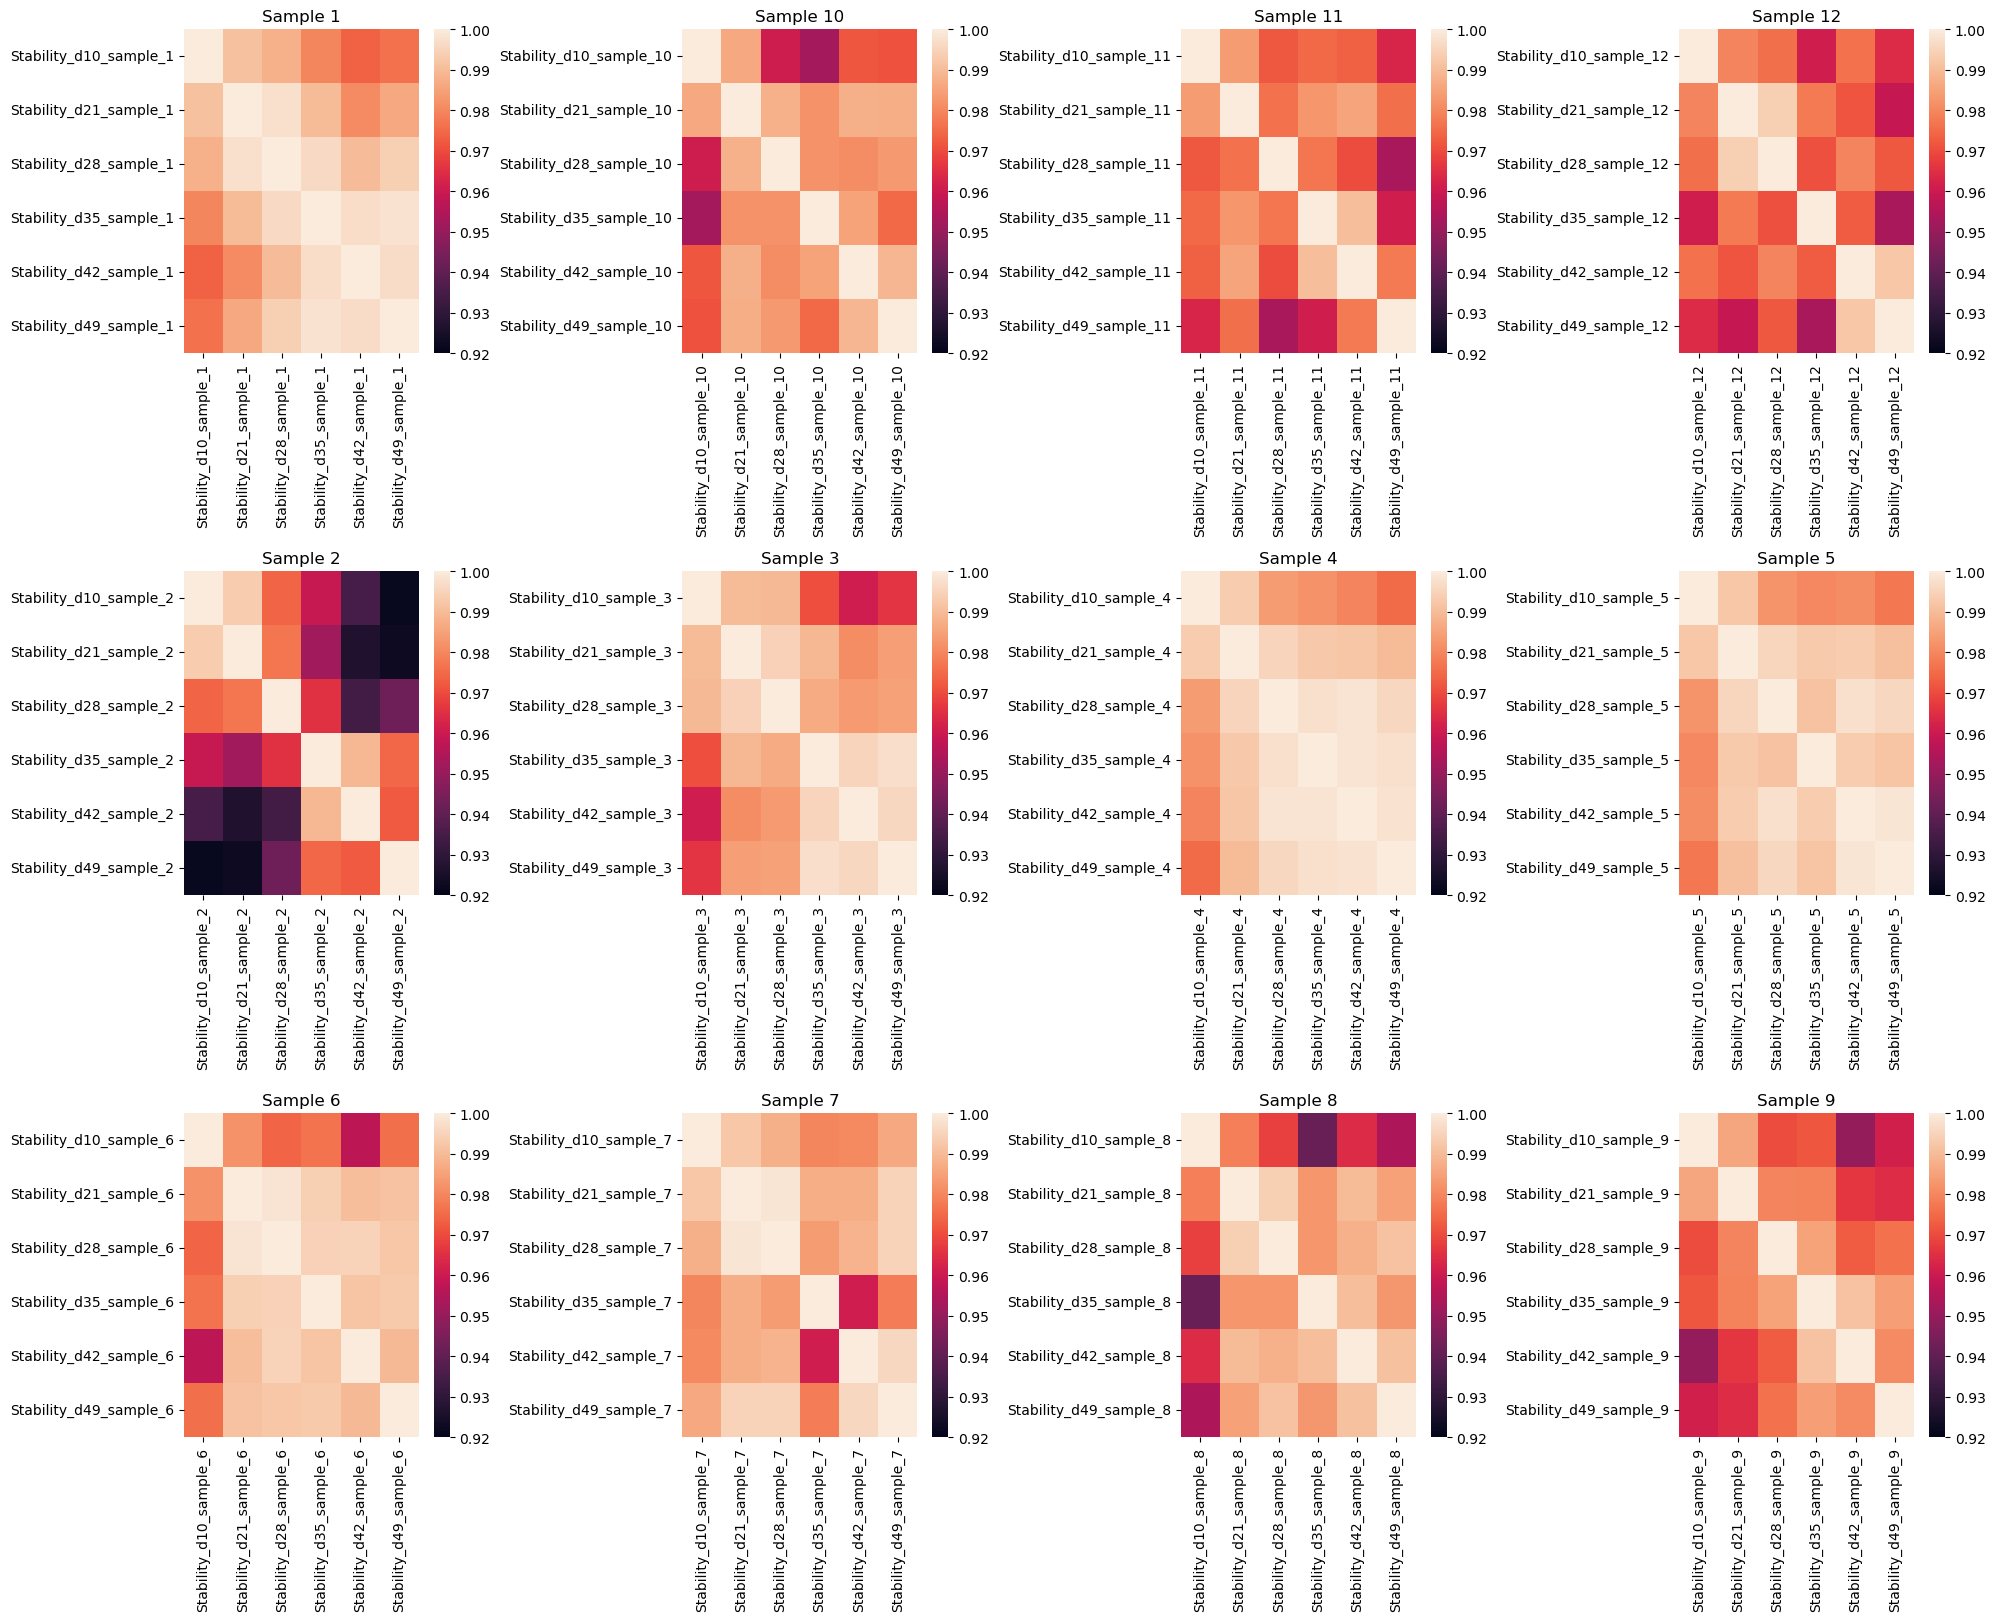

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming 'meta' and 'df_all_CPM' are your DataFrame objects and 'var_genes' is your list of variable genes

ordered_samples = []
meta = meta.sort_values(by=['sample', 'age'])

# Get unique samples and determine grid size
unique_samples = sorted(list(set(meta['sample'])))
num_samples = len(unique_samples)
grid_size = int(np.ceil(np.sqrt(num_samples)))

fig, axes = plt.subplots(grid_size, grid_size, figsize=(20, 20))
axes = axes.flatten()

for i, sample in enumerate(unique_samples):
    sample_samples = list(meta.loc[meta['sample'] == sample].index)
    
    # Plot heatmap on the corresponding subplot
    sns.heatmap(df_all_CPM.loc[var_genes, sample_samples].corr(), ax=axes[i],vmin=0.92,vmax=1)
    
    # Set title for each subplot
    axes[i].set_title(f'Sample {sample}')
    
    # Save each individual heatmap if needed
    plt.figure(figsize=(10, 10))
    sns.heatmap(df_all_CPM.loc[var_genes, sample_samples].corr())
    plt.savefig(f"stability_plots/sample_{sample}_timepoints_corr_variablegenes.png", dpi=350, bbox_inches='tight', pad_inches=0)
    plt.close()

    ordered_samples += sample_samples

    # Print the minimum correlation value for each sample
    print(df_all_CPM.loc[var_genes, sample_samples].corr().min().min())

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.savefig("stability_plots/grid_heatmap.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.tight_layout()
plt.show()
plt.close()


In [ ]:
time_deseq2 = pd.read_csv("stability_plots/deseq2_time.tsv",sep="\t")
time_deseq2['signed_pval'] = np.sign(time_deseq2['log2FoldChange'])*-np.log10(time_deseq2['pvalue'])

In [113]:
time_deseq2 = pd.read_csv("stability_plots/deseq2_time.tsv",sep="\t")

In [120]:
time_deseq2['signed_pval'] = np.sign(time_deseq2['log2FoldChange'])*-np.log10(time_deseq2['pvalue'])

In [134]:
df_all_CPM.loc['SCG2'].sort_values(ascending=False).head(n=20)

Stability_d49_sample_6     1252.338619
Stability_d42_sample_6     1230.033006
Stability_d49_sample_5     1172.177492
Stability_d42_sample_4     1109.856471
Stability_d49_sample_4     1055.891079
Stability_d35_sample_6      945.082403
Stability_d42_sample_5      894.350640
Stability_d49_sample_3      813.560820
Stability_d35_sample_4      698.793117
Stability_d35_sample_5      625.430521
Stability_d49_sample_1      593.570923
Stability_d42_sample_1      538.337955
Stability_d35_sample_3      504.603627
Stability_d35_sample_1      465.030196
Stability_d28_sample_5      432.080696
Stability_d28_sample_4      421.658162
Stability_d49_sample_10     417.637339
Stability_d49_sample_7      399.011786
Stability_d28_sample_6      380.549496
Stability_d49_sample_11     380.278943
Name: SCG2, dtype: float64

In [122]:
-np.log10(6.341472e-01)

0.19780992078140155

In [125]:
neg_genes = list(time_deseq2.sort_values(by='signed_pval').index)
pos_genes = list(time_deseq2.sort_values(by='signed_pval',ascending=False).index)

In [128]:
with open('stability_plots/neg_genes.txt', 'w') as f:
    for line in neg_genes:
        f.write(f"{line}\n")

with open('stability_plots/pos_genes.txt', 'w') as f:
    for line in pos_genes:
        f.write(f"{line}\n")


In [126]:
neg_genes

['LIN28A',
 'NR6A1',
 'LIN28B',
 'EBF2',
 'ARID3B',
 'WFIKKN1',
 'SDK1',
 'ONECUT2',
 'RAI14',
 'ARID3A',
 'NHLH2',
 'SIX1',
 'CASP3',
 'GRK5',
 'PPP2R1B',
 'UBE2G1',
 'MDGA1',
 'GRM2',
 'ONECUT3',
 'GREB1L',
 'SCML2',
 'PGD',
 'CBX5',
 'HAPLN1',
 'IGF2BP3',
 'GCNT4',
 'IGDCC3',
 'ZNF281',
 'PXDN',
 'THSD7B',
 'PRMT1',
 'EYA1',
 'SIM1',
 'PLEKHJ1',
 'PEAK1',
 'EBF3',
 'THOC5',
 'ITGB1',
 'SKIDA1',
 'AKIRIN2',
 'EPS8L1',
 'TMEM169',
 'SS18',
 'ARGLU1',
 'LYPLA1',
 'NDUFS6',
 'MKNK1',
 'HIC2',
 'AKIRIN1',
 'GREB1',
 'PFAS',
 'SEMA6D',
 'PIK3C2B',
 'PUDP',
 'ATXN7L2',
 'HOXA1',
 'DNAJC22',
 'SHC1',
 'LYPLA2',
 'SVIP',
 'XRN2',
 'KLHL4',
 'PPP1CA',
 'HOMEZ',
 'ZNF124',
 'YTHDF2',
 'ATP5MC2',
 'LDLRAD3',
 'ENPP1',
 'PFN1',
 'CRIM1',
 'KCTD10',
 'LZTS2',
 'ILF3',
 'ENSG00000250360',
 'INKA2',
 'GTF3C5',
 'NEFM',
 'PLEKHG2',
 'STK38',
 'MPDU1',
 'DANCR',
 'PPIA',
 'PELI1',
 'SALL4',
 'RGS10',
 'ADAM12',
 'H3-3A',
 'PPP1R17',
 'NR2C1',
 'MAML3',
 'SWSAP1',
 'PRKG1',
 'IGF1R',
 'ASCC2',
 'DDX5'

In [109]:
np.min(a_min)

0.9216863834122349

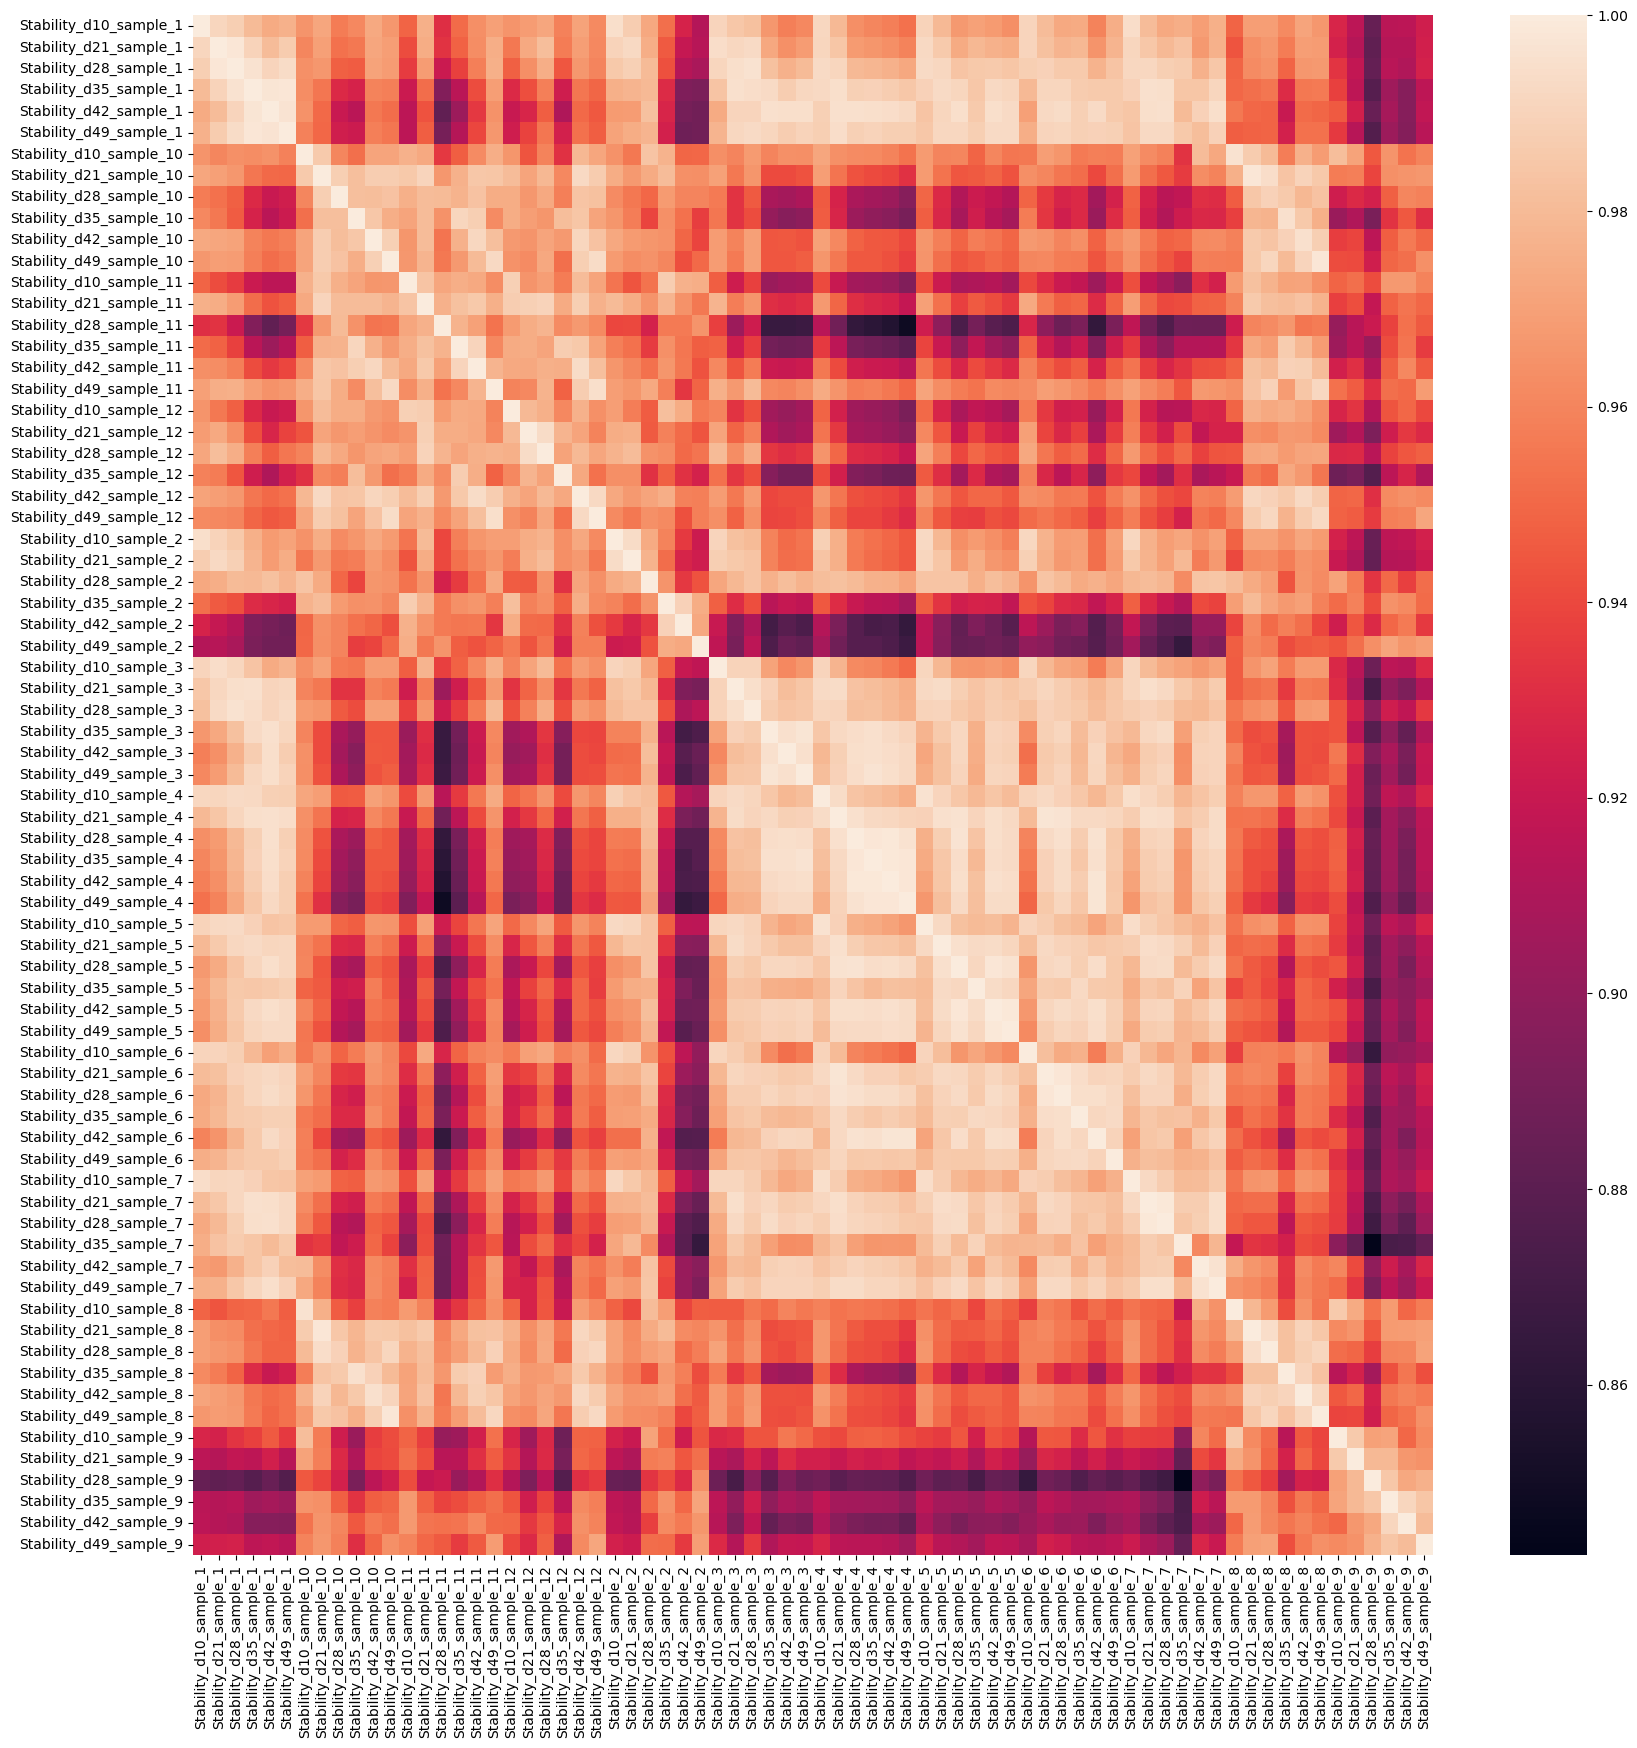

In [73]:
plt.figure(figsize=(20,20))
sns.heatmap(df_all_CPM.loc[var_genes,ordered_samples].corr())
plt.savefig("stability_plots/samples_correlation_1000var_CPM.png",dpi=350,bbox_inches='tight',pad_inches=0)
plt.show()
plt.close()

['Stability_d10_sample_4',
 'Stability_d21_sample_4',
 'Stability_d28_sample_4',
 'Stability_d35_sample_4',
 'Stability_d42_sample_4',
 'Stability_d49_sample_4',
 'Stability_d10_sample_6',
 'Stability_d21_sample_6',
 'Stability_d28_sample_6',
 'Stability_d35_sample_6',
 'Stability_d42_sample_6',
 'Stability_d49_sample_6',
 'Stability_d10_sample_9',
 'Stability_d21_sample_9',
 'Stability_d28_sample_9',
 'Stability_d35_sample_9',
 'Stability_d42_sample_9',
 'Stability_d49_sample_9',
 'Stability_d10_sample_10',
 'Stability_d21_sample_10',
 'Stability_d28_sample_10',
 'Stability_d35_sample_10',
 'Stability_d42_sample_10',
 'Stability_d49_sample_10',
 'Stability_d10_sample_3',
 'Stability_d21_sample_3',
 'Stability_d28_sample_3',
 'Stability_d35_sample_3',
 'Stability_d42_sample_3',
 'Stability_d49_sample_3',
 'Stability_d10_sample_1',
 'Stability_d21_sample_1',
 'Stability_d28_sample_1',
 'Stability_d35_sample_1',
 'Stability_d42_sample_1',
 'Stability_d49_sample_1',
 'Stability_d10_sample

In [60]:
sample_samples

Index(['Stability_d10_sample_4', 'Stability_d21_sample_4',
       'Stability_d28_sample_4', 'Stability_d35_sample_4',
       'Stability_d42_sample_4', 'Stability_d49_sample_4'],
      dtype='object')

In [48]:
meta.index

Index(['Stability_d21_sample_9', 'Stability_d21_sample_4',
       'Stability_d21_sample_5', 'Stability_d21_sample_10',
       'Stability_d21_sample_7', 'Stability_d21_sample_6',
       'Stability_d21_sample_1', 'Stability_d21_sample_12',
       'Stability_d21_sample_3', 'Stability_d21_sample_2',
       'Stability_d21_sample_11', 'Stability_d21_sample_8',
       'Stability_d49_sample_2', 'Stability_d49_sample_4',
       'Stability_d49_sample_11', 'Stability_d49_sample_3',
       'Stability_d49_sample_12', 'Stability_d49_sample_9',
       'Stability_d49_sample_1', 'Stability_d49_sample_6',
       'Stability_d49_sample_8', 'Stability_d49_sample_5',
       'Stability_d49_sample_10', 'Stability_d49_sample_7',
       'Stability_d35_sample_6', 'Stability_d35_sample_11',
       'Stability_d35_sample_9', 'Stability_d35_sample_8',
       'Stability_d35_sample_2', 'Stability_d35_sample_1',
       'Stability_d35_sample_3', 'Stability_d35_sample_5',
       'Stability_d35_sample_10', 'Stability_d35_

In [ ]:
df_all_CPM

In [16]:
!ls Stability_d21/Stability_d21_sample_9/10.MAPPING/

Stability_d21_sample_9_STAR_Aligned.sortedByCoord.out.bam
Stability_d21_sample_9_STAR_Log.final.out
Stability_d21_sample_9_STAR_Log.out
Stability_d21_sample_9_STAR_Log.progress.out
Stability_d21_sample_9_STAR_ReadsPerGene.out.tab
Stability_d21_sample_9_STAR_SJ.out.tab
Stability_d21_sample_9_STAR_Signal.Unique.str1.out.bg
Stability_d21_sample_9_STAR_Signal.UniqueMultiple.str1.out.bg
Stability_d21_sample_9_STAR_Unmapped.out.mate1
Stability_d21_sample_9_STAR_Unmapped.out.mate2
Stability_d21_sample_9_STAR__STARtmp


In [ ]:
Stability_d21_sample_9_STAR_ReadsPerGene.out.tab
Stability_d21_sample_9_STAR_ReadsPerGene.out.tab

In [15]:
!ls Stability_d21/Stability_d21_sample_9/10.MAPPING/

Stability_d21_sample_9_STAR_Aligned.sortedByCoord.out.bam
Stability_d21_sample_9_STAR_Log.final.out
Stability_d21_sample_9_STAR_Log.out
Stability_d21_sample_9_STAR_Log.progress.out
Stability_d21_sample_9_STAR_ReadsPerGene.out.tab
Stability_d21_sample_9_STAR_SJ.out.tab
Stability_d21_sample_9_STAR_Signal.Unique.str1.out.bg
Stability_d21_sample_9_STAR_Signal.UniqueMultiple.str1.out.bg
Stability_d21_sample_9_STAR_Unmapped.out.mate1
Stability_d21_sample_9_STAR_Unmapped.out.mate2
Stability_d21_sample_9_STAR__STARtmp
